# 1. BUSINESS UNDERSTANDING

## 1.1 Business Objectives

**Latar Belakang**


Selektifnya financial institution menjadikan sebagian besar nasabah ditolak dari sebagian besar aplikasi pinjaman karena riwayat kredit yang tidak mencukupi sehingga cenderung beralih ke pemberi pinjaman yang tidak dapat dipercaya.

**Business Objectives**

Meminimalisasi kerugian akibat nasabah yang tidak mampu melunasi tagihan kredit dan memaksimalkan pelayanan kepada nasabah lainnya. Kemudian, berupaya memperluas inklusi keuangan dengan menggunakan banyak data untuk memprediksi kemampuan pembayaran pinjaman dari pemohon.

**Business Success Criteria**

Perusahaan tidak keliru dalam memilih nasabah: tidak menolak nasabah yang mampu melunasi tagihan kredit dan menolak nasabah yang tidak mampu melunasi tagihan kreditnya. Perusahaan dapat memberikan pengalaman inklusif dengan pengalaman meminjam yang aman dan positif sehingga memberikan solusi win to win.

# 2. DATA UNDERSTANDING

## 2.1 Initial Data Report

### 2.1.1 Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import os


import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_seq_items = 500
pd.options.display.max_rows = 500

### 2.1.2 Get Data

In [ ]:
app_train = pd.read_csv('application_train.csv')
print('Jumlah baris dan kolom pada data train =',app_train.shape)
app_train.head()

Jumlah baris dan kolom pada data train = (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
app_test = pd.read_csv('application_test.csv')
print('Jumlah baris dan kolom pada data test =',app_test.shape)
app_test.head()

Jumlah baris dan kolom pada data test = (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2 Describe Data

### 2.2.1 Data types

In [ ]:
# Tipe data tiap kolom pada data train
app_train.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [ ]:
# Tipe data tiap kolom pada data test
app_test.dtypes

SK_ID_CURR                        int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


- Setiap kolom yang sama pada data train dan test memiliki tipe data yang identik sehingga untuk proses selanjutnya, kita bisa melakukan observasi hanya pada salah satu dataframe.

### 2.2.2 Statistical Summary

In [ ]:
#mengkategorikan variabel numerical untuk dataset train
nums_train=[i for i in app_train.columns if app_train[i].dtypes != 'object' and i not in ['TARGET']]
cats_train=[i for i in app_train.columns if app_train[i].dtypes == 'object']

#mengkategorikan variabel categorical untuk dataset test
nums_test=[i for i in app_test.columns if app_test[i].dtypes != 'object' and i not in ['TARGET']]
cats_test=[i for i in app_test.columns if app_test[i].dtypes == 'object']

#### 2.2.2.1 Numerical Approach

In [ ]:
# distribusi statistik dari data train
app_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


- Jika dilihat dari output di atas, masih terdapat beberapa nilai maksimum yang terlampau jauh dari nilai rata-ratanya. Misal, untuk kolom ANT_INCOME_TOTAL, nilai maksimumnya sangat besar! Hal ini tentunya bukan berarti kita harus menghapus nilai tersebut karena kita masih perlu melakukan analisis lebih lanjut untuk memutuskan tindakan yang tepat dalam menghandle nilai-nilai tersebut.

#### 2.2.2.2 Categorical Approach

In [ ]:
app_train[cats_train].describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


- Kita bisa lihat bahwa masih terdapat kolom yang jumlah antara valuenya tidak seimbang (misal, EMERGENCYSTATE_MODE).

## 2.3 Verify Data Quality

### 2.3.1 Checking Missing Value

In [ ]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(app_train)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [ ]:
missing_values_table(app_test)

Your selected dataframe has 121 columns.
There are 64 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
COMMONAREA_AVG,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2
LIVINGAPARTMENTS_AVG,32780,67.2


In [ ]:
# Get the columns with > 50% missing
missing_df = missing_values_table(app_train);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will get a closer look at %d columns.' % len(missing_columns))

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.
We will get a closer look at 41 columns.


- Kita bisa lihat bahwa terdapat beberapa kolom yang memiliki persentase missing value >50%. Kolom-kolom ini perlu di-handling missing valuenya dengan teknik-teknik tertentu. Pada notebook ini, kita akan mencoba meng-clustering kolom-kolom tersebut terlebih dahulu. Kemudian, jika masih terdapat kolom dengan missing value >50%, kita akan hapus kolom tersebut.

### 2.3.2 Checking Outliers

In [ ]:
#Mencari outlier dengan IQR
def find_outliers_IQR(app_train):

   q1=app_train.quantile(0.25)

   q3=app_train.quantile(0.75)

   IQR=q3-q1

#Mendefinisikan data outlier
   outliers = app_train[((app_train<(q1-1.5*IQR)) | (app_train>(q3+1.5*IQR)))]

   return outliers

In [ ]:
#Mencari outlier dari data outliers yang telah dibuat
outliers = find_outliers_IQR(app_train[nums_train])

print("number of outliers: " + str(len(outliers)))

number of outliers: 307511


In [ ]:
print("max outlier value:\n" + str(outliers.max()))

max outlier value:
SK_ID_CURR                               NaN
CNT_CHILDREN                    1.900000e+01
AMT_INCOME_TOTAL                1.170000e+08
AMT_CREDIT                      4.050000e+06
AMT_ANNUITY                     2.580255e+05
AMT_GOODS_PRICE                 4.050000e+06
REGION_POPULATION_RELATIVE      7.250800e-02
DAYS_BIRTH                               NaN
DAYS_EMPLOYED                   3.652430e+05
DAYS_REGISTRATION              -1.568600e+04
DAYS_ID_PUBLISH                          NaN
OWN_CAR_AGE                     9.100000e+01
FLAG_MOBIL                      0.000000e+00
FLAG_EMP_PHONE                  0.000000e+00
FLAG_WORK_PHONE                 1.000000e+00
FLAG_CONT_MOBILE                0.000000e+00
FLAG_PHONE                               NaN
FLAG_EMAIL                      1.000000e+00
CNT_FAM_MEMBERS                 2.000000e+01
REGION_RATING_CLIENT            3.000000e+00
REGION_RATING_CLIENT_W_CITY     3.000000e+00
HOUR_APPR_PROCESS_START         2.30

In [ ]:
print("min outlier value:\n" + str(outliers.min()))

min outlier value:
SK_ID_CURR                               NaN
CNT_CHILDREN                    3.000000e+00
AMT_INCOME_TOTAL                3.375450e+05
AMT_CREDIT                      1.618767e+06
AMT_ANNUITY                     6.170850e+04
AMT_GOODS_PRICE                 1.345500e+06
REGION_POPULATION_RELATIVE      7.250800e-02
DAYS_BIRTH                               NaN
DAYS_EMPLOYED                  -1.791200e+04
DAYS_REGISTRATION              -2.467200e+04
DAYS_ID_PUBLISH                          NaN
OWN_CAR_AGE                     3.100000e+01
FLAG_MOBIL                      0.000000e+00
FLAG_EMP_PHONE                  0.000000e+00
FLAG_WORK_PHONE                 1.000000e+00
FLAG_CONT_MOBILE                0.000000e+00
FLAG_PHONE                               NaN
FLAG_EMAIL                      1.000000e+00
CNT_FAM_MEMBERS                 5.000000e+00
REGION_RATING_CLIENT            1.000000e+00
REGION_RATING_CLIENT_W_CITY     1.000000e+00
HOUR_APPR_PROCESS_START         0.00

In [ ]:
#parameter yang hanya berisi data numerical pt.1
int_features = app_train[["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]]

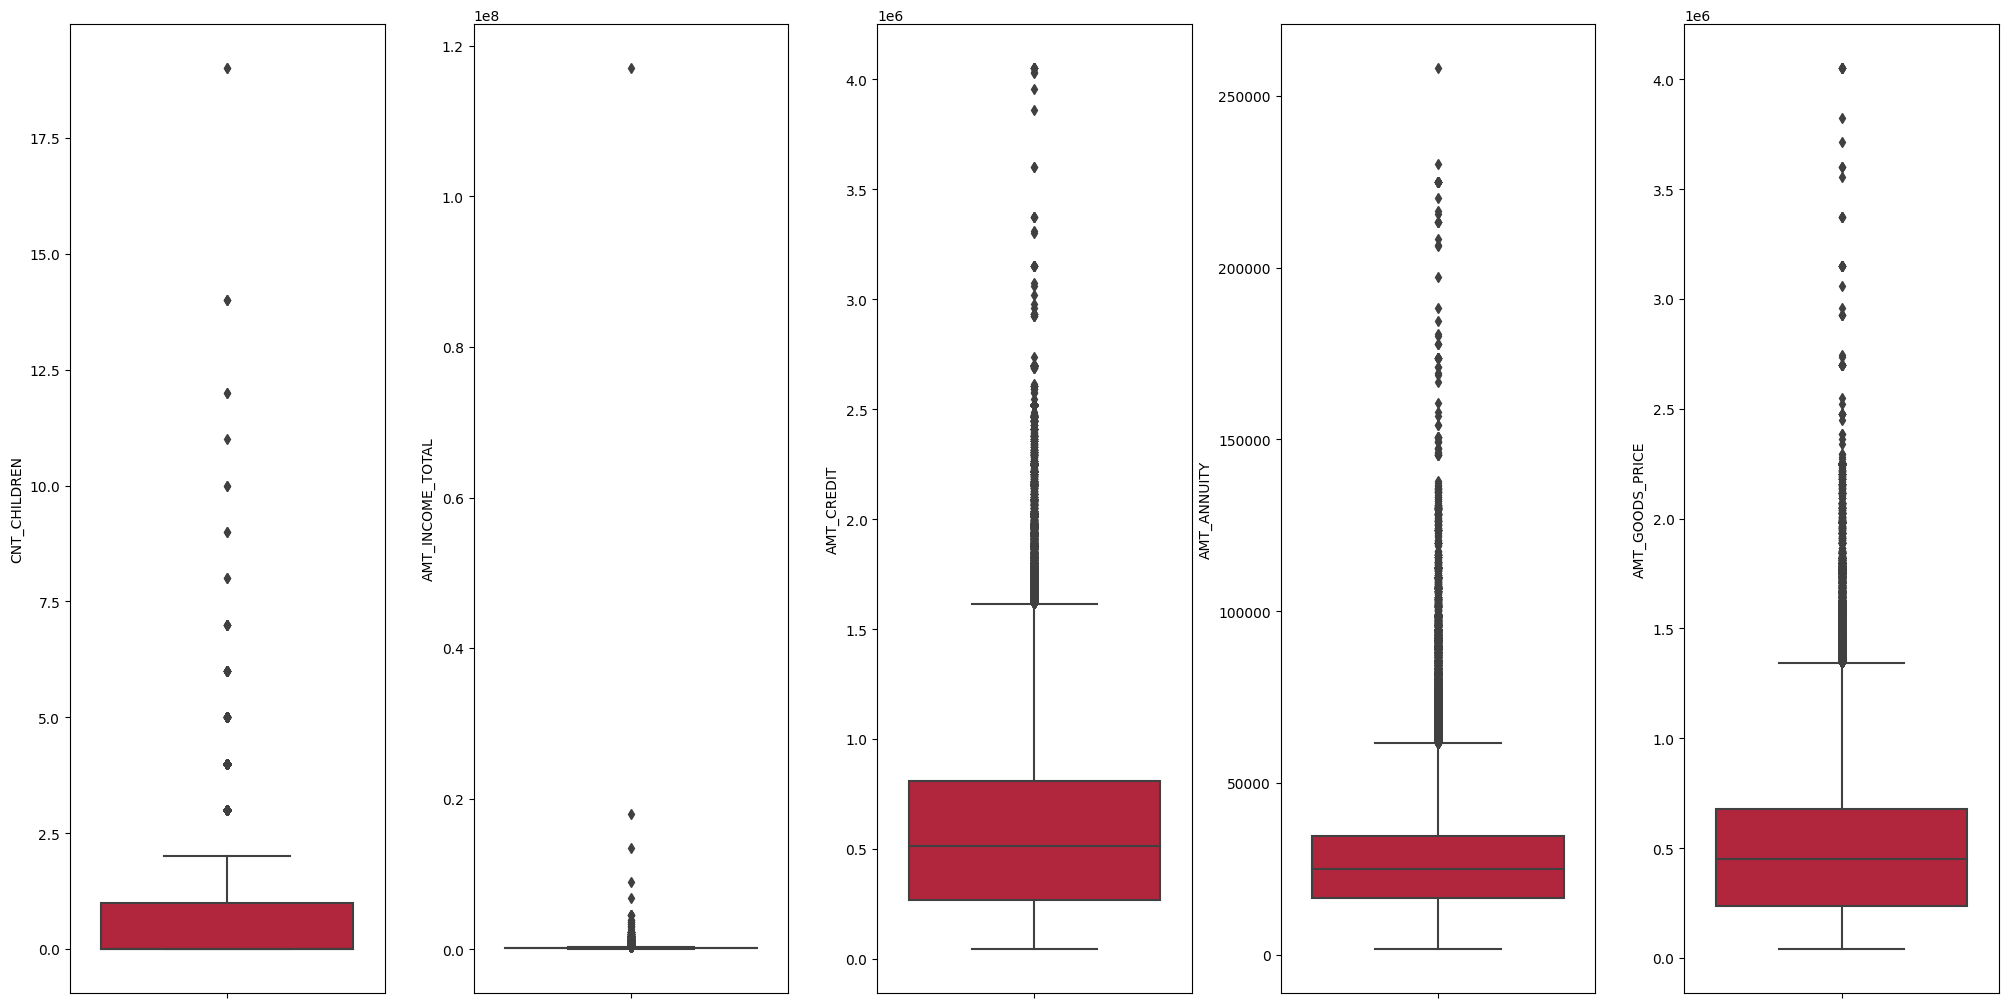

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index], color='#C80F2E')
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

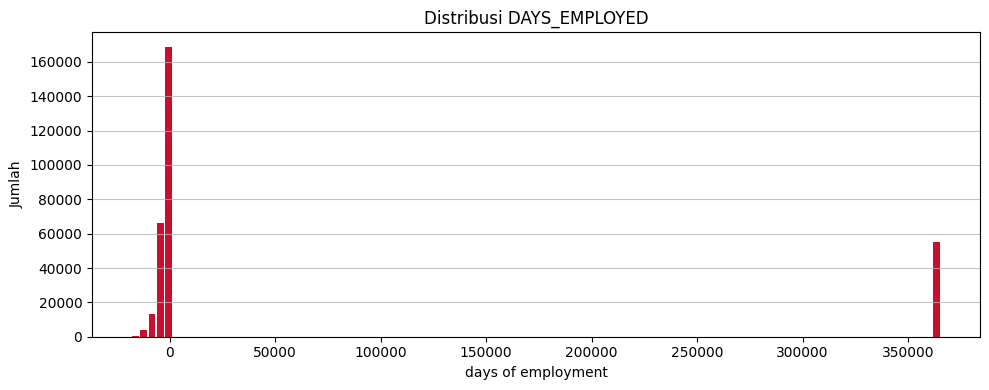

In [ ]:
plt.figure(figsize=(10, 4))
n, bins, patches = plt.hist(x=app_train['DAYS_EMPLOYED'], bins=100, color='#C80F2E',
                            alpha=1, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('days of employment')
plt.ylabel('Jumlah')
plt.title('Distribusi DAYS_EMPLOYED')
plt.tight_layout()
plt.show()

- Kita temukan beberapa outliers pada kolom CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, dan DAYS_EMPLOYED.
- CNT_CHILDREN: max outliers kolom ini adalah 19. Walaupun memiliki 19 anak terbilang sangat banyak dibanding orang-orang pada umumnya. Namun, hal tersebut bukanlah hal yang tidak mungkin. Jadi, kita akan biarkan nilai outliers tersebut untuk saat ini.
- AMT_INCOME_TOTAL: seperti yang disebutkan sebelumnya kolom ini memiliki nilai maksimum yang terlampau jauh dari nilai rata-ratanya. Niali tersebut memang bukan hal yang mustahil sehingga kita perlu melakukan analisis lebih lanjut untuk memutuskan tindakan yang tepat.
- AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE: kolom-kolom ini juga memiliki nilai-nilai outliers. Seperti pada kasus sebelumnya, kita akan melakukan analisis lebih lanjut untuk memutuskan tindakan yang tepat.
- DAYS_EMPLOYED: Outilers pada kolom ini menunjukkan bahwa ada beberapa klien yang sudah bekerja selama 350.000 hari atau sekitar 1000 tahun! Hal ini tentunya tidak mungkin. Karena itu, kita pasti akan meng-handle outliers tersebut.

## 2.4 Initial Data Exploration

### 2.4.1 Distributions

**DATASET APP_TRAIN**

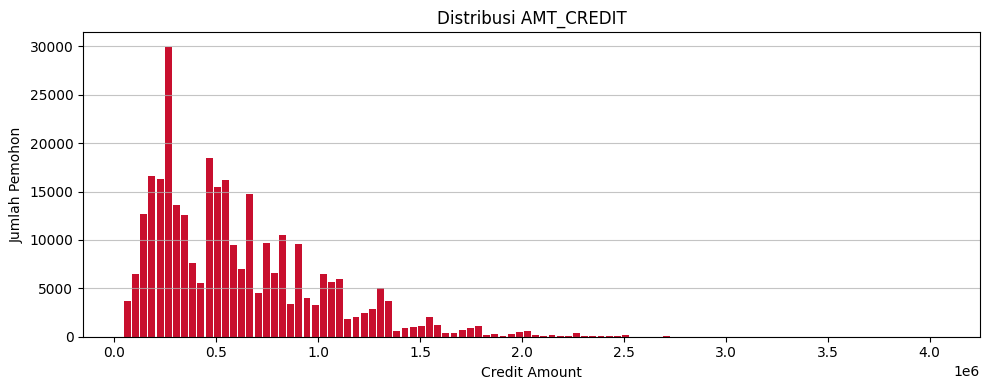

In [ ]:
plt.figure(figsize=(10, 4))
n, bins, patches = plt.hist(x=app_train['AMT_CREDIT'], bins=100, color='#C80F2E',
                            alpha=1, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Credit Amount')
plt.ylabel('Jumlah Pemohon')
plt.title('Distribusi AMT_CREDIT')
plt.tight_layout()
plt.show()

In [ ]:
app_train['AMT_CREDIT'].skew()

1.2347784971349398

Distribusi AMT_CREDIT: right skewed

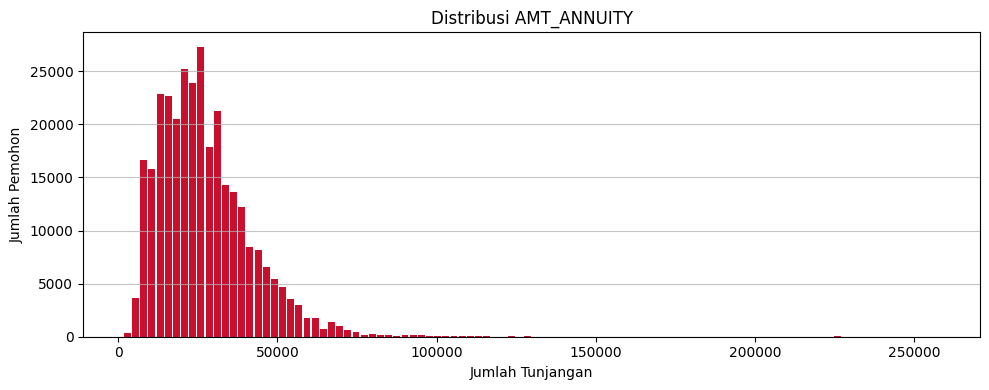

In [ ]:
plt.figure(figsize=(10, 4))
n, bins, patches = plt.hist(x=app_train['AMT_ANNUITY'], bins=100, color='#C80F2E',
                            alpha=1, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Jumlah Tunjangan')
plt.ylabel('Jumlah Pemohon')
plt.title('Distribusi AMT_ANNUITY')
plt.tight_layout()
plt.show()

In [ ]:
app_train['AMT_ANNUITY'].skew()

1.5797773638612507

Distribusi AMT_ANNUITY: right skewed

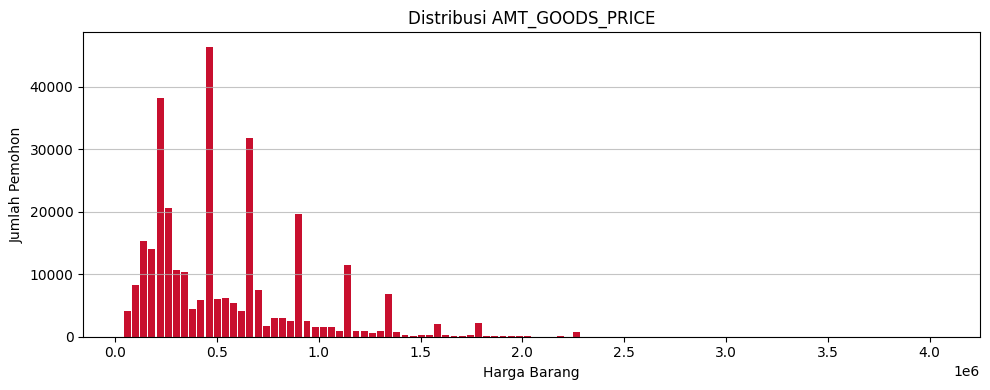

In [ ]:
plt.figure(figsize=(10, 4))
n, bins, patches = plt.hist(x=app_train['AMT_GOODS_PRICE'], bins=100, color='#C80F2E',
                            alpha=1, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Harga Barang')
plt.ylabel('Jumlah Pemohon')
plt.title('Distribusi AMT_GOODS_PRICE')
plt.tight_layout()
plt.show()

In [ ]:
app_train['AMT_GOODS_PRICE'].skew()

1.3490003414747445

Distribusi AMT_GOODS_PRICE: right skewed

- Kita temukan bahwa distribusi AMT_CREDIT, AMT_ANNUITY, dan AMT_GOODS_PRICE masih tidak normal sehingga kita perlu melakukan transformasi sebelum tahap modeling.

**DATASET APP_TEST**

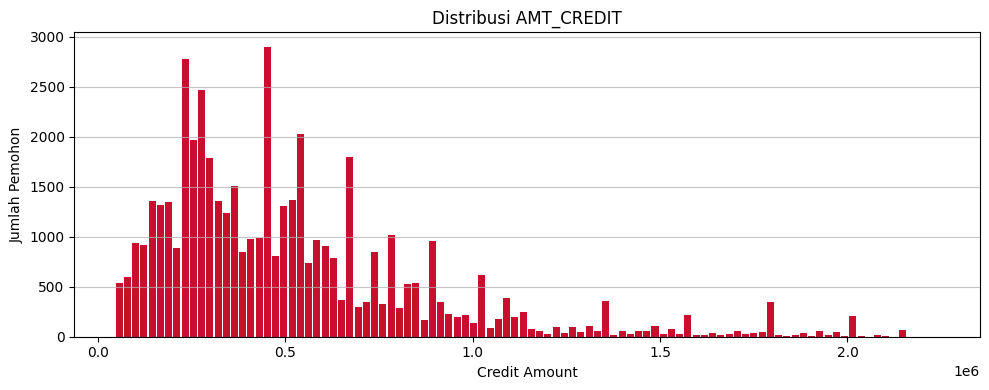

In [ ]:
plt.figure(figsize=(10, 4))
n, bins, patches = plt.hist(x=app_test['AMT_CREDIT'], bins=100, color='#C80F2E',
                            alpha=1, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Credit Amount')
plt.ylabel('Jumlah Pemohon')
plt.title('Distribusi AMT_CREDIT')
plt.tight_layout()
plt.show()

In [ ]:
app_test['AMT_CREDIT'].skew()

1.6488309851235012

Distribusi AMT_CREDIT: right skewed

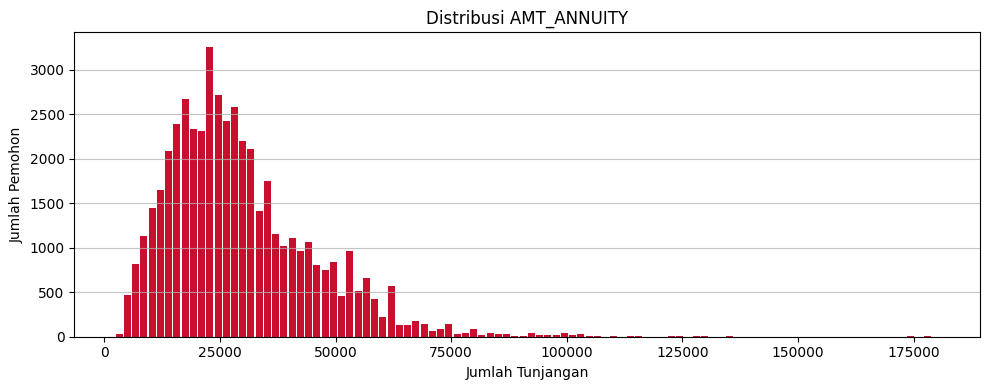

In [ ]:
plt.figure(figsize=(10, 4))
n, bins, patches = plt.hist(x=app_test['AMT_ANNUITY'], bins=100, color='#C80F2E',
                            alpha=1, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Jumlah Tunjangan')
plt.ylabel('Jumlah Pemohon')
plt.title('Distribusi AMT_ANNUITY')
plt.tight_layout()
plt.show()

In [ ]:
app_test['AMT_ANNUITY'].skew()

1.4743723052041933

Distribusi AMT_ANNUITY: right skewed

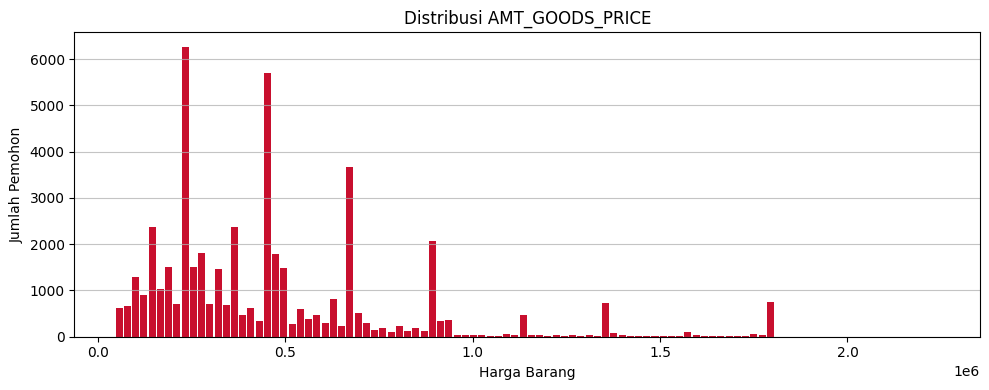

In [ ]:
plt.figure(figsize=(10, 4))
n, bins, patches = plt.hist(x=app_test['AMT_GOODS_PRICE'], bins=100, color='#C80F2E',
                            alpha=1, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Harga Barang')
plt.ylabel('Jumlah Pemohon')
plt.title('Distribusi AMT_GOODS_PRICE')
plt.tight_layout()
plt.show()

In [ ]:
app_test['AMT_GOODS_PRICE'].skew()

1.741483107849261

Distribusi AMT_GOODS_PRICE: right skewed

- Distribusi kolom-kolom di atas pada dataset app_test juga masih belum normal sehingga kita perlu melakukan transformasi.

### 2.4.2 Correlations

In [ ]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


# 3. DATA PREPARATION

## 3.1 Clean The Data

### 3.1.1 Handling Outliers

**DATASET APP_TRAIN**

DAYS EMPLOYED

In [ ]:
# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

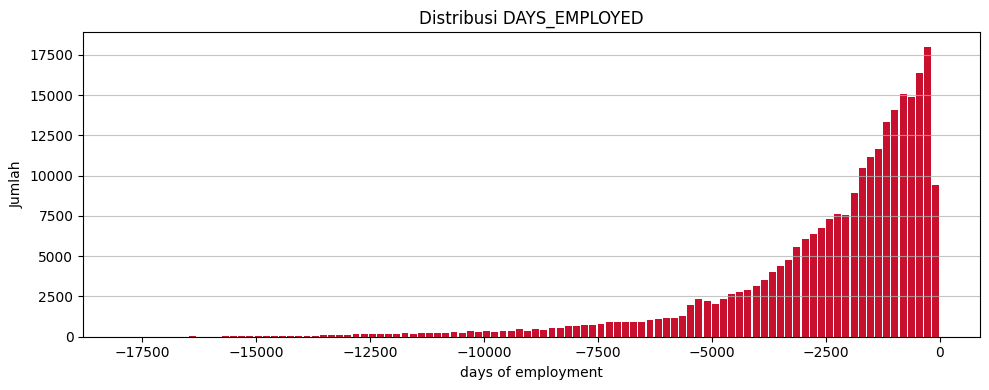

In [ ]:
plt.figure(figsize=(10, 4))
n, bins, patches = plt.hist(x=app_train['DAYS_EMPLOYED'], bins=100, color='#C80F2E',
                            alpha=1, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('days of employment')
plt.ylabel('Jumlah')
plt.title('Distribusi DAYS_EMPLOYED')
plt.tight_layout()
plt.show()

AMT_INCOME_TOTAL

In [ ]:
app_train.loc[app_train['AMT_INCOME_TOTAL'] == 1.170000e+08]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


- Dengan pendapatan yang besar, customer ini tidak mampu membayar tagihan kredit. Hal ini tentunya sangat aneh sehingga akan lebih baik jika outlier ini dihapus.

In [ ]:
app_train.drop(app_train[app_train['AMT_INCOME_TOTAL'] == 1.170000e+08].index, inplace = True)

**DATASET APP_TEST**

DAYS EMPLOYED

In [ ]:
# Replace the anomalous values with nan
app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

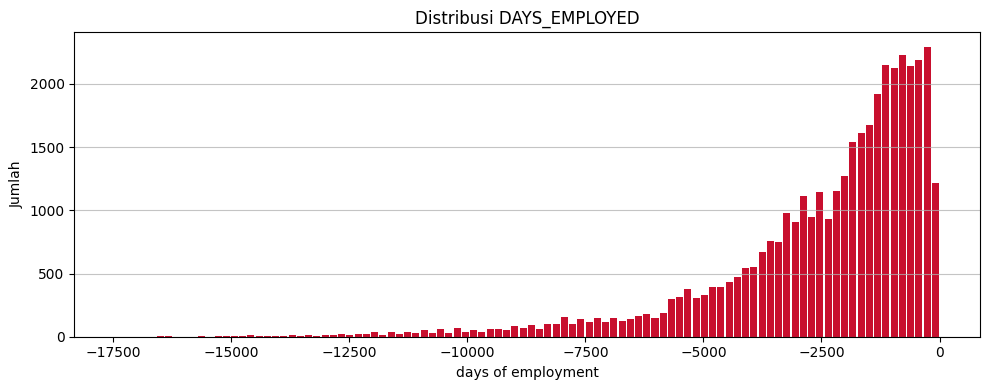

In [ ]:
plt.figure(figsize=(10, 4))
n, bins, patches = plt.hist(x=app_test['DAYS_EMPLOYED'], bins=100, color='#C80F2E',
                            alpha=1, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('days of employment')
plt.ylabel('Jumlah')
plt.title('Distribusi DAYS_EMPLOYED')
plt.tight_layout()
plt.show()

### 3.1.2 Clustering

- Pada bagian data Understanding, terdapat data kolom dengan jumlah missing lebih dari 50%. Penanganan masalah ditargetkan untuk langsung di-drop. Namun, setelah pengecekan data dilakukan handling berupa clustering data yang dirasa penting untuk mengetahui client memiliki aset (1) atau tidak (0). Kemudian, setelah di kelompokan data-data yang bersifat AVG, MODE, dan MEDI di drop.

In [ ]:
# untuk data train
app_train['BASEMENT_AREA'] = app_train['BASEMENTAREA_AVG'].apply(lambda x: 1 if x > 0 else 0)
app_train['COMMON_AREA'] = app_train['COMMONAREA_AVG'].apply(lambda x: 1 if x > 0 else 0)
app_train['ELEVATORS'] = app_train['ELEVATORS_AVG'].apply(lambda x: 1 if x > 0 else 0)
app_train['ENTRANCES'] = app_train['ENTRANCES_AVG'].apply(lambda x: 1 if x > 0 else 0)
app_train['LIVING_AREA'] = app_train['LIVINGAREA_AVG'].apply(lambda x: 1 if x > 0 else 0)
app_train['NONLIVING_AREA'] =app_train['NONLIVINGAREA_AVG'].apply(lambda x: 1 if x > 0 else 0)
app_train['LAND_AREA'] =app_train['LANDAREA_AVG'].apply(lambda x: 1 if x > 0 else 0)
app_train['NONLIVING_APARTMENTS'] = app_train['NONLIVINGAPARTMENTS_AVG'].apply(lambda x: 1 if x > 0 else 0)
app_train['LIVING_APARTMENTS'] = app_train['LIVINGAPARTMENTS_AVG'].apply(lambda x: 1 if x > 0 else 0)

#untuk data test
app_test['BASEMENT_AREA'] = app_test['BASEMENTAREA_AVG'].apply(lambda x: 1 if x > 0 else 0)
app_test['COMMON_AREA'] = app_test['COMMONAREA_AVG'].apply(lambda x: 1 if x > 0 else 0)
app_test['ELEVATORS'] = app_test['ELEVATORS_AVG'].apply(lambda x: 1 if x > 0 else 0)
app_test['ENTRANCES'] = app_test['ENTRANCES_AVG'].apply(lambda x: 1 if x > 0 else 0)
app_test['LIVING_AREA'] = app_test['LIVINGAREA_AVG'].apply(lambda x: 1 if x > 0 else 0)
app_test['NONLIVING_AREA'] =app_test['NONLIVINGAREA_AVG'].apply(lambda x: 1 if x > 0 else 0)
app_test['LAND_AREA'] =app_test['LANDAREA_AVG'].apply(lambda x: 1 if x > 0 else 0)
app_test['NONLIVING_APARTMENTS'] = app_test['NONLIVINGAPARTMENTS_AVG'].apply(lambda x: 1 if x > 0 else 0)
app_test['LIVING_APARTMENTS'] = app_test['LIVINGAPARTMENTS_AVG'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
app_train = app_train.drop(['BASEMENTAREA_AVG','BASEMENTAREA_MODE','BASEMENTAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE',
                            'COMMONAREA_MEDI','ELEVATORS_AVG','ELEVATORS_MODE','ELEVATORS_MEDI','ENTRANCES_AVG','ENTRANCES_MODE',
                            'ENTRANCES_MEDI','LIVINGAREA_AVG','LIVINGAREA_MODE','LIVINGAREA_MEDI','NONLIVINGAREA_AVG','NONLIVINGAREA_MODE',
                            'NONLIVINGAREA_MEDI','LANDAREA_AVG','LANDAREA_MODE','LANDAREA_MEDI','NONLIVINGAPARTMENTS_AVG',
                            'NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MODE',
                            'LIVINGAPARTMENTS_MEDI'], axis = 1)

app_test = app_test.drop(['BASEMENTAREA_AVG','BASEMENTAREA_MODE','BASEMENTAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE',
                          'COMMONAREA_MEDI','ELEVATORS_AVG','ELEVATORS_MODE','ELEVATORS_MEDI','ENTRANCES_AVG','ENTRANCES_MODE',
                          'ENTRANCES_MEDI','LIVINGAREA_AVG','LIVINGAREA_MODE','LIVINGAREA_MEDI','NONLIVINGAREA_AVG',
                          'NONLIVINGAREA_MODE','NONLIVINGAREA_MEDI','LANDAREA_AVG','LANDAREA_MODE','LANDAREA_MEDI',
                          'NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_AVG',
                          'LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_MEDI'], axis = 1)

In [ ]:
missing_values_table(app_train)

Your selected dataframe has 104 columns.
There are 41 columns that have missing values.


,Missing Values,% of Total Values
FONDKAPREMONT_MODE,210294,68.4
FLOORSMIN_MEDI,208641,67.8
FLOORSMIN_MODE,208641,67.8
FLOORSMIN_AVG,208641,67.8
YEARS_BUILD_AVG,204487,66.5
YEARS_BUILD_MEDI,204487,66.5
YEARS_BUILD_MODE,204487,66.5
OWN_CAR_AGE,202928,66.0
EXT_SOURCE_1,173378,56.4
WALLSMATERIAL_MODE,156341,50.8


### 3.1.3 Drop Unnecessary

**DROP KOLOM YANG TIDAK PENTING**

- Dalam data tabel diketahui bahwa terdapat beberapa kolom yang sudah pasti tidak akan digunakan sehingga bisa di drop kolom.

In [ ]:
#Removing kolom yang tidak digunakan dataset application train
app_train = app_train.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
                            'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
                            'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',
                            'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20',
                            'FLAG_DOCUMENT_21'], axis = 1)

In [ ]:
#Removing kolom yang tidak digunakan dataset application test
app_test = app_test.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
                            'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
                            'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',
                            'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20',
                            'FLAG_DOCUMENT_21'], axis = 1)

**HANDLING MISSING VALUE (UNTUK YANG PERSENTASE MISSING VALUE-NYA DI BAWAH 2%)**

- Setelah melakukan pengecekan missing value di bagian data understanding, data dengan jumlah missing value yang sangat sedikit bisa dihapus row-nya.


In [ ]:
#Drop baris kolom missing value sedikit dataset application train
app_train = app_train.dropna(subset=['NAME_TYPE_SUITE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','EXT_SOURCE_2','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE'])

In [ ]:
#Drop baris kolom missing value sedikit dataset application test
app_test = app_test.dropna(subset=['NAME_TYPE_SUITE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','AMT_ANNUITY','EXT_SOURCE_2'])

**HANDLING MISSING VALUE (UNTUK YANG PERSENTASE MISSING VALUE-NYA DI ATAS 50%)**

- Setelah melakukan penanganan missing value >50% dengan cara clustering data cukup penting selanjutnya dapat di drop kolom yang tidak ingin digunakan

In [ ]:
#Removing kolom yang diatas 50% dataset application train
app_train = app_train.drop(['FONDKAPREMONT_MODE','HOUSETYPE_MODE','APARTMENTS_MEDI','APARTMENTS_MODE',
                            'APARTMENTS_AVG','WALLSMATERIAL_MODE','EXT_SOURCE_1','OWN_CAR_AGE','YEARS_BUILD_MEDI',
                            'YEARS_BUILD_MODE','YEARS_BUILD_AVG','FLOORSMIN_MEDI','FLOORSMIN_MODE','FLOORSMIN_AVG'], axis = 1)

In [ ]:
#Removing kolom yang diatas 50% dataset application test
app_test = app_test.drop(['FONDKAPREMONT_MODE','FLOORSMIN_MODE','FLOORSMIN_MEDI','FLOORSMIN_AVG',
                            'OWN_CAR_AGE','YEARS_BUILD_AVG','YEARS_BUILD_MEDI','YEARS_BUILD_MODE'], axis = 1)

In [ ]:
missing_values_table(app_train)

Your selected dataframe has 70 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
FLOORSMAX_MEDI,151677,49.8
FLOORSMAX_AVG,151677,49.8
FLOORSMAX_MODE,151677,49.8
YEARS_BEGINEXPLUATATION_AVG,148686,48.8
YEARS_BEGINEXPLUATATION_MODE,148686,48.8
YEARS_BEGINEXPLUATATION_MEDI,148686,48.8
TOTALAREA_MODE,147132,48.3
EMERGENCYSTATE_MODE,144475,47.4
OCCUPATION_TYPE,95435,31.3
EXT_SOURCE_3,60251,19.8


### 3.1.4 Dealing With Median/Unknown/Zeros

Pada data yang memiliki jumlah missing value <50% maka bisa diisi dengan menggunakan opsi pengisian median/unknown/Zeros sesuai dengan keaadaan datanya.

#### 3.1.4.1 **Handling Missing Value Pada Data Numerical**

**Dataset App_train**

In [ ]:
#mengkategorikan kembali variabel numerical untuk dataset train
nums_train=[i for i in app_train.columns if app_train[i].dtypes != 'object' and i not in ['TARGET']]

In [ ]:
# Menampilkan variabel numerical yang memiliki missing value <50%
colnull = 0
for col in nums_train:
  null = app_train[col].isnull().sum()
  percent = 0.5*len(app_train.index)
  if null < percent and null > 0:
    print(f'{app_train[col].dtype}, ({round(float((null/len(app_train.index))*100),1)} persen) {col} : {null}')
    colnull += 1
print("")
print(f'jumlah numerical missing <50%: {colnull}')

float64, (18.0 persen) DAYS_EMPLOYED : 54852
float64, (19.8 persen) EXT_SOURCE_3 : 60251
float64, (48.8 persen) YEARS_BEGINEXPLUATATION_AVG : 148686
float64, (49.8 persen) FLOORSMAX_AVG : 151677
float64, (48.8 persen) YEARS_BEGINEXPLUATATION_MODE : 148686
float64, (49.8 persen) FLOORSMAX_MODE : 151677
float64, (48.8 persen) YEARS_BEGINEXPLUATATION_MEDI : 148686
float64, (49.8 persen) FLOORSMAX_MEDI : 151677
float64, (48.3 persen) TOTALAREA_MODE : 147132
float64, (13.5 persen) AMT_REQ_CREDIT_BUREAU_HOUR : 41108
float64, (13.5 persen) AMT_REQ_CREDIT_BUREAU_DAY : 41108
float64, (13.5 persen) AMT_REQ_CREDIT_BUREAU_WEEK : 41108
float64, (13.5 persen) AMT_REQ_CREDIT_BUREAU_MON : 41108
float64, (13.5 persen) AMT_REQ_CREDIT_BUREAU_QRT : 41108
float64, (13.5 persen) AMT_REQ_CREDIT_BUREAU_YEAR : 41108

jumlah numerical missing <50%: 15


In [ ]:
#Mengisi missing numerical dengan median
a = ['EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE',
     'FLOORSMAX_MEDI','TOTALAREA_MODE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
     'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MODE','DAYS_EMPLOYED']
app_train[a] = app_train[a].fillna(app_train[a].median())

**Dataset App_test**

In [ ]:
nums_test=[i for i in app_test.columns if app_test[i].dtypes != 'object' and i not in ['TARGET']]

In [ ]:
# Menampilkan variabel numerical yang memiliki missing value <50%
colnull = 0
for col in nums_test:
  null = app_test[col].isnull().sum()
  percent = 0.5*len(app_test.index)
  if null < percent and null > 0:
    print(f'{app_test[col].dtype}, ({round(float((null/len(app_test.index))*100),1)} persen) {col} : {null}')
    colnull += 1
print("")
print(f'jumlah numerical missing <50%: {colnull}')

float64, (18.9 persen) DAYS_EMPLOYED : 9047
float64, (42.2 persen) EXT_SOURCE_1 : 20161
float64, (17.8 persen) EXT_SOURCE_3 : 8502
float64, (49.1 persen) APARTMENTS_AVG : 23438
float64, (46.9 persen) YEARS_BEGINEXPLUATATION_AVG : 22418
float64, (47.9 persen) FLOORSMAX_AVG : 22878
float64, (49.1 persen) APARTMENTS_MODE : 23438
float64, (46.9 persen) YEARS_BEGINEXPLUATATION_MODE : 22418
float64, (47.9 persen) FLOORSMAX_MODE : 22878
float64, (49.1 persen) APARTMENTS_MEDI : 23438
float64, (46.9 persen) YEARS_BEGINEXPLUATATION_MEDI : 22418
float64, (47.9 persen) FLOORSMAX_MEDI : 22878
float64, (46.4 persen) TOTALAREA_MODE : 22189
float64, (12.5 persen) AMT_REQ_CREDIT_BUREAU_HOUR : 5951
float64, (12.5 persen) AMT_REQ_CREDIT_BUREAU_DAY : 5951
float64, (12.5 persen) AMT_REQ_CREDIT_BUREAU_WEEK : 5951
float64, (12.5 persen) AMT_REQ_CREDIT_BUREAU_MON : 5951
float64, (12.5 persen) AMT_REQ_CREDIT_BUREAU_QRT : 5951
float64, (12.5 persen) AMT_REQ_CREDIT_BUREAU_YEAR : 5951

jumlah numerical missing <5

In [ ]:
#Mengisi missing numerical dengan median
b = ['EXT_SOURCE_1','EXT_SOURCE_3','APARTMENTS_AVG','FLOORSMAX_AVG','APARTMENTS_MODE','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE',
     'APARTMENTS_MEDI','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','AMT_REQ_CREDIT_BUREAU_HOUR',
     'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
     'AMT_REQ_CREDIT_BUREAU_YEAR','YEARS_BEGINEXPLUATATION_AVG','DAYS_EMPLOYED']
app_test[b] = app_test[b].fillna(app_test[b].median())

#### 3.1.4.2 **Handling Missing Value pada Data Categorical**

**DATASET APP_TRAIN**

In [ ]:
cats_train=[i for i in app_train.columns if app_train[i].dtypes == 'object']

In [ ]:
# Menampilkan variabel numerical yang memiliki missing value <50%
colnull = 0
for col in cats_train:
  null = app_train[col].isnull().sum()
  percent = 0.5*len(app_train.index)
  if null < percent and null > 0:
    print(f'{app_train[col].dtype}, ({round(float((null/len(app_train.index))*100),1)} persen) {col} : {null}')
    colnull += 1
print("")
print(f'jumlah kategorical missing <50%: {colnull}')

object, (31.3 persen) OCCUPATION_TYPE : 95435
object, (47.4 persen) EMERGENCYSTATE_MODE : 144475

jumlah kategorical missing <50%: 2


In [ ]:
#Mengecek jumlah value agar dapat menentukan diisi unk or 0
print(app_train['OCCUPATION_TYPE'].value_counts())
print(app_train['EMERGENCYSTATE_MODE'].value_counts())

Laborers                 54729
Sales staff              31790
Core staff               27263
Managers                 21114
Drivers                  18456
High skill tech staff    11261
Accountants               9698
Medicine staff            8459
Security staff            6667
Cooking staff             5898
Cleaning staff            4615
Private service staff     2629
Low-skill Laborers        2077
Waiters/barmen staff      1335
Secretaries               1293
Realty agents              742
HR staff                   558
IT staff                   511
Name: OCCUPATION_TYPE, dtype: int64
No     157743
Yes      2312
Name: EMERGENCYSTATE_MODE, dtype: int64


In [ ]:
#Mengisi unknown yang jumlah valuenya lebih dari 2
app_train['OCCUPATION_TYPE'] = np.where(app_train['OCCUPATION_TYPE'].isnull(),'unk',app_train['OCCUPATION_TYPE'])

In [ ]:
#Mengisi Zero (0) untuk yang jumlah unique valuenya 2 (Yes/No or 1/0)
app_train['EMERGENCYSTATE_MODE'] = np.where(app_train['EMERGENCYSTATE_MODE'].isnull(),'unk',app_train['EMERGENCYSTATE_MODE'])

**DATASET APP_TEST**

In [ ]:
cats_test=[i for i in app_train.columns if app_train[i].dtypes == 'object']

In [ ]:
# Menampilkan variabel numerical yang memiliki missing value <50%
colnull = 0
for col in cats_test:
  null = app_test[col].isnull().sum()
  percent = 0.5*len(app_test.index)
  if null < percent and null > 0:
    print(f'{app_test[col].dtype}, ({round(float((null/len(app_test.index))*100),1)} persen) {col} : {null}')
    colnull += 1
print("")
print(f'jumlah categorical missing <50%: {colnull}')

object, (31.9 persen) OCCUPATION_TYPE : 15249
object, (45.6 persen) EMERGENCYSTATE_MODE : 21780

jumlah categorical missing <50%: 2


In [ ]:
#Mengecek jumlah value agar dapat menentukan diisi unk or 0
print(app_test['OCCUPATION_TYPE'].value_counts())
print(app_test['HOUSETYPE_MODE'].value_counts())
print(app_test['WALLSMATERIAL_MODE'].value_counts())
print(app_test['EMERGENCYSTATE_MODE'].value_counts())

Laborers                 8512
Sales staff              4969
Core staff               4288
Managers                 3497
Drivers                  2718
High skill tech staff    1826
Accountants              1594
Medicine staff           1292
Security staff            898
Cooking staff             881
Cleaning staff            641
Private service staff     443
Low-skill Laborers        268
Secretaries               210
Waiters/barmen staff      175
Realty agents             133
HR staff                   99
IT staff                   79
Name: OCCUPATION_TYPE, dtype: int64
block of flats      24150
specific housing      253
terraced house        199
Name: HOUSETYPE_MODE, dtype: int64
Panel           11051
Stone, brick    10199
Block            1400
Wooden            776
Mixed             343
Monolithic        283
Others            276
Name: WALLSMATERIAL_MODE, dtype: int64
No     25644
Yes      348
Name: EMERGENCYSTATE_MODE, dtype: int64


In [ ]:
 #Mengisi unknown yang jumlah valuenya lebih dari 2
d2 = ['OCCUPATION_TYPE','HOUSETYPE_MODE','WALLSMATERIAL_MODE']
app_test[d2] = np.where(app_test[d2].isnull(),'unk',app_test[d2])

In [ ]:
#Mengisi Zero (0) untuk yang jumlah valuenya 2 (Yes/No or 1/0)
app_test['EMERGENCYSTATE_MODE'] = np.where(app_test['EMERGENCYSTATE_MODE'].isnull(),'unk',app_test['EMERGENCYSTATE_MODE'])

### 3.1.5 Check Data

**RE-CHECK MISSING VALUE**

- Setelah melakukan cleaning data cek kembali missing value dan periksa hingga menunjukan tidak ada missing.

In [ ]:
missing_values_table(app_train)

Your selected dataframe has 70 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
missing_values_table(app_test)

Your selected dataframe has 75 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


**RE-CHECK COLUMN DATA**

- Setelah melakukan penanganan terhadap missing value. Selanjutnya, diputuskan untuk mengecek jumlah data antara train dan test. Pada data ini ketika missing value sudah teratasi diketahui bahwa jumlah kolom train dan test tidak sesuai atau salah satu data memiliki ketimpangan yaitu kolom datanya lebih banyak. Dari hal ini untuk memudahkan proses penganalisisan data selanjutnya, diputuskan bahwa kolom yang kelebihan akan di drop hingga jumlah kolomnya sama dengan data train. (except = kolom target)

In [ ]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304530 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    304530 non-null  int64  
 1   TARGET                        304530 non-null  int64  
 2   NAME_CONTRACT_TYPE            304530 non-null  object 
 3   CODE_GENDER                   304530 non-null  object 
 4   FLAG_OWN_CAR                  304530 non-null  object 
 5   FLAG_OWN_REALTY               304530 non-null  object 
 6   CNT_CHILDREN                  304530 non-null  int64  
 7   AMT_INCOME_TOTAL              304530 non-null  float64
 8   AMT_CREDIT                    304530 non-null  float64
 9   AMT_ANNUITY                   304530 non-null  float64
 10  AMT_GOODS_PRICE               304530 non-null  float64
 11  NAME_TYPE_SUITE               304530 non-null  object 
 12  NAME_INCOME_TYPE              304530 non-nul

In [ ]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47772 entries, 0 to 48743
Data columns (total 75 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    47772 non-null  int64  
 1   NAME_CONTRACT_TYPE            47772 non-null  object 
 2   CODE_GENDER                   47772 non-null  object 
 3   FLAG_OWN_CAR                  47772 non-null  object 
 4   FLAG_OWN_REALTY               47772 non-null  object 
 5   CNT_CHILDREN                  47772 non-null  int64  
 6   AMT_INCOME_TOTAL              47772 non-null  float64
 7   AMT_CREDIT                    47772 non-null  float64
 8   AMT_ANNUITY                   47772 non-null  float64
 9   AMT_GOODS_PRICE               47772 non-null  float64
 10  NAME_TYPE_SUITE               47772 non-null  object 
 11  NAME_INCOME_TYPE              47772 non-null  object 
 12  NAME_EDUCATION_TYPE           47772 non-null  object 
 13  N

In [ ]:
#Removing kolom yang sudah di drop dari data train
app_test = app_test.drop(['EXT_SOURCE_1','APARTMENTS_AVG','WALLSMATERIAL_MODE','APARTMENTS_MODE','APARTMENTS_MEDI','HOUSETYPE_MODE'], axis = 1)

In [ ]:
print('Shape data app_train:',app_train.shape)
print('Shape data app_test:',app_test.shape)

Shape data app_train: (304530, 70)
Shape data app_test: (47772, 69)


### 3.1.6 Dealing With Duplicates

Pada proses pengecekan tidak terdapat duplicate kolom di dataset ini sehingga tidak perlu di drop salah satu kolomnya.

In [ ]:
app_train.duplicated().sum()

0

In [ ]:
app_test.duplicated().sum()

0

**EXPORTING DATA FOR DASHBOARD**

**Taking Samples**

- Karena ukuran file yang terlalu besar, kita perlu mengambil sample dari data app_train terlebih dahulu untuk membuat dashboard. Sample yang kita ambil berjumlah ~50% dari jumlah keseluruhan data app_train.

In [ ]:
app_train_samples = app_train.sample(n=153000)

In [ ]:
app_train_samples.to_csv('app_train_50%samples_DB.csv',index=False)

LINK DASHBOARD:



### 3.1.7 Transformations

**DATASET APP_TRAIN**

In [ ]:
app_train[['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']]=np.log(app_train[['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']])

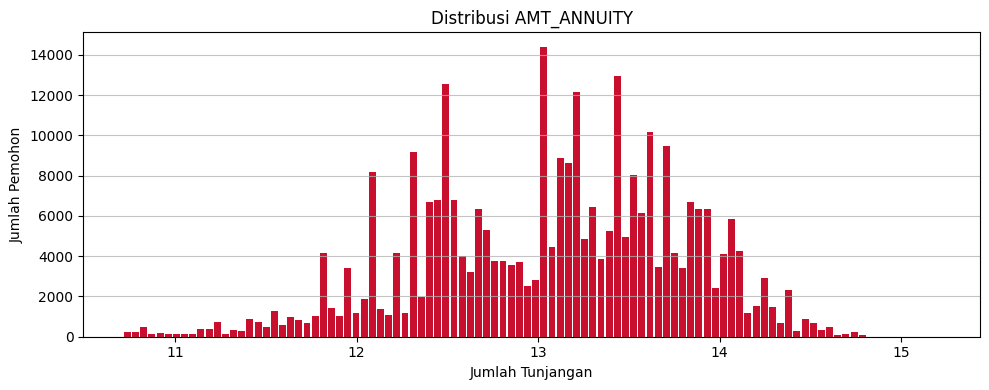

In [ ]:
plt.figure(figsize=(10, 4))
n, bins, patches = plt.hist(x=app_train['AMT_CREDIT'], bins=100, color='#C80F2E',
                            alpha=1, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Jumlah Tunjangan')
plt.ylabel('Jumlah Pemohon')
plt.title('Distribusi AMT_ANNUITY')
plt.tight_layout()
plt.show()

In [ ]:
app_train['AMT_CREDIT'].skew()

-0.3445895641381675

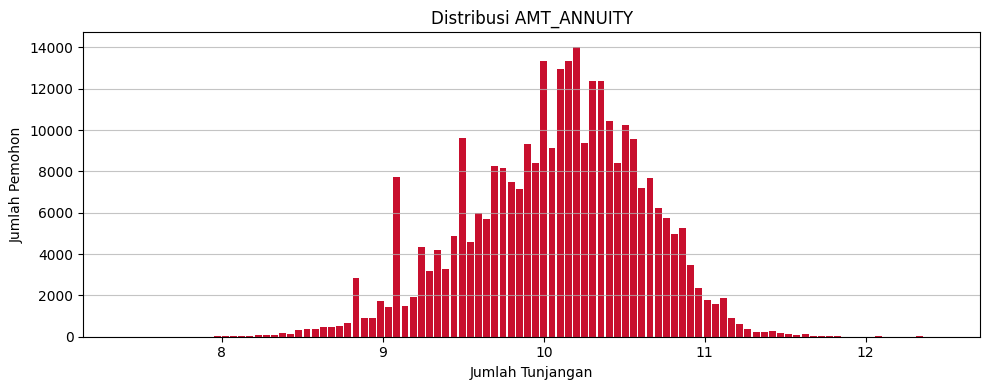

In [ ]:
plt.figure(figsize=(10, 4))
n, bins, patches = plt.hist(x=app_train['AMT_ANNUITY'], bins=100, color='#C80F2E',
                            alpha=1, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Jumlah Tunjangan')
plt.ylabel('Jumlah Pemohon')
plt.title('Distribusi AMT_ANNUITY')
plt.tight_layout()
plt.show()

In [ ]:
app_train['AMT_ANNUITY'].skew()

-0.351142264266225

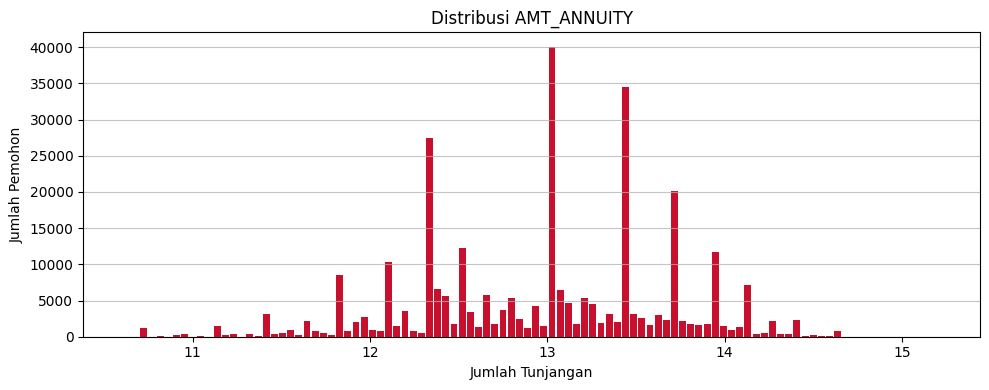

In [ ]:
plt.figure(figsize=(10, 4))
n, bins, patches = plt.hist(x=app_train['AMT_GOODS_PRICE'], bins=100, color='#C80F2E',
                            alpha=1, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Jumlah Tunjangan')
plt.ylabel('Jumlah Pemohon')
plt.title('Distribusi AMT_ANNUITY')
plt.tight_layout()
plt.show()

**DATASET APP_TEST**

In [ ]:
app_test[['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']]=np.log(app_test[['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']])

### 3.1.8 Encoding

#### 3.1.8.1 Label Encoding

In [ ]:
# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

**DATASET APP_TRAIN**

- Kolom GENDER_CODE pada dataset app_train memiliki 4 value XNA. Keempat value tersebut akan kita hapus terlebih dahulu sebelum melakukan encoding.

In [ ]:
app_train.drop(app_train.loc[app_train['CODE_GENDER'] == 'XNA'].index, inplace = True)

In [ ]:
app_train['CODE_GENDER'].value_counts()

F    200481
M    104045
Name: CODE_GENDER, dtype: int64

In [ ]:
# Encode labels in pada kolom 'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY'
app_train['NAME_CONTRACT_TYPE']= label_encoder.fit_transform(app_train['NAME_CONTRACT_TYPE'])
app_train['CODE_GENDER']= label_encoder.fit_transform(app_train['CODE_GENDER'])
app_train['FLAG_OWN_CAR']= label_encoder.fit_transform(app_train['FLAG_OWN_CAR'])
app_train['FLAG_OWN_REALTY']= label_encoder.fit_transform(app_train['FLAG_OWN_REALTY'])

#cek perubahan
enc_train = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']

for col in enc_train:
    print(f'''Value count kolom {col}:''')
    print(app_train[col].value_counts())
    print()

Value count kolom NAME_CONTRACT_TYPE:
0    276612
1     27914
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count kolom CODE_GENDER:
0    200481
1    104045
Name: CODE_GENDER, dtype: int64

Value count kolom FLAG_OWN_CAR:
0    200907
1    103619
Name: FLAG_OWN_CAR, dtype: int64

Value count kolom FLAG_OWN_REALTY:
1    211636
0     92890
Name: FLAG_OWN_REALTY, dtype: int64



**ALTERING ENCODED FEATURES**

In [ ]:
app_train['NAME_CONTRACT_TYPE'] = app_train['NAME_CONTRACT_TYPE'].astype(str)
app_train['CODE_GENDER'] = app_train['CODE_GENDER'].astype(str)
app_train['FLAG_OWN_CAR'] = app_train['FLAG_OWN_CAR'].astype(str)
app_train['FLAG_OWN_REALTY'] = app_train['FLAG_OWN_REALTY'].astype(str)

Dengan itu kita dapat ketahui:
- NAME_CONTRACT_TYPE: 0 (Cash loans), 1 (Revolving loans)
- FLAG_OWN_CAR: 0 (No), 1 (Yes)
- FLAG_OWN_REALTY: 0 (No), 1 (Yes)

**DATASET APP_TEST**

In [ ]:
# Encode labels in column'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY'.
app_test['NAME_CONTRACT_TYPE']= label_encoder.fit_transform(app_test['NAME_CONTRACT_TYPE'])
app_test['CODE_GENDER']= label_encoder.fit_transform(app_test['CODE_GENDER'])
app_test['FLAG_OWN_CAR']= label_encoder.fit_transform(app_test['FLAG_OWN_CAR'])
app_test['FLAG_OWN_REALTY']= label_encoder.fit_transform(app_test['FLAG_OWN_REALTY'])

In [ ]:
#cek perubahan
enc_test = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']

for col in enc_test:
    print(f'''Value count kolom {col}:''')
    print(app_test[col].value_counts())
    print()

Value count kolom NAME_CONTRACT_TYPE:
0    47362
1      410
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count kolom CODE_GENDER:
0    32021
1    15751
Name: CODE_GENDER, dtype: int64

Value count kolom FLAG_OWN_CAR:
0    31675
1    16097
Name: FLAG_OWN_CAR, dtype: int64

Value count kolom FLAG_OWN_REALTY:
1    32854
0    14918
Name: FLAG_OWN_REALTY, dtype: int64



In [ ]:
app_test['NAME_CONTRACT_TYPE'] = app_test['NAME_CONTRACT_TYPE'].astype(str)
app_test['CODE_GENDER'] = app_test['CODE_GENDER'].astype(str)
app_test['FLAG_OWN_CAR'] = app_test['FLAG_OWN_CAR'].astype(str)
app_test['FLAG_OWN_REALTY'] = app_test['FLAG_OWN_REALTY'].astype(str)

Dengan itu kita dapat ketahui:
- NAME_CONTRACT_TYPE: 0 (Cash loans), 1 (Revolving loans)
- CODE_GENDER: 0 (Female), 1 (Male)
- FLAG_OWN_CAR: 0 (No), 1 (Yes)
- FLAG_OWN_REALTY: 0 (No), 1 (Yes)

#### 3.1.8.2 One-Hot Encoding

**DATASET APP_TRAIN**

In [ ]:
#mengkategorikan kembali variabel numerical untuk dataset train
nums_train=[i for i in app_train.columns if app_train[i].dtypes != 'object' and i not in ['TARGET']]
cats_train=[i for i in app_train.columns if app_train[i].dtypes == 'object']

In [ ]:
app_train_encoded = pd.get_dummies(app_train[cats_train])
app_train_encoded

,NAME_CONTRACT_TYPE_0,NAME_CONTRACT_TYPE_1,CODE_GENDER_0,CODE_GENDER_1,FLAG_OWN_CAR_0,FLAG_OWN_CAR_1,FLAG_OWN_REALTY_0,FLAG_OWN_REALTY_1,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,...,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_unk
0,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
307507,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
307508,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
307509,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
apptrain_encoded_to_cats = app_train_encoded.astype(str)

In [ ]:
app_train = pd.concat([app_train, apptrain_encoded_to_cats], axis=1)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_unk
0,100002,1,0,1,0,1,0,202500.0,12.915579,10.114579,...,0,0,0,0,0,0,0,1,0,0
1,100003,0,0,0,0,0,0,270000.0,14.072864,10.482864,...,0,0,0,0,0,0,0,1,0,0
2,100004,0,1,1,1,1,0,67500.0,11.813030,8.817298,...,0,0,0,0,0,0,0,0,0,1
3,100006,0,0,0,0,1,0,135000.0,12.652944,10.298448,...,0,0,0,0,0,0,0,0,0,1
4,100007,0,0,1,0,1,0,121500.0,13.148031,9.992665,...,0,0,0,0,0,0,0,0,0,1


**DATASET APP_TEST**

In [ ]:
#mengkategorikan kembali variabel numerical untuk dataset train
nums_test=[i for i in app_train.columns if app_train[i].dtypes != 'object' and i not in ['TARGET']]
cats_test=[i for i in app_train.columns if app_train[i].dtypes == 'object']

In [ ]:
cats_test

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'NAME_CONTRACT_TYPE_0',
 'NAME_CONTRACT_TYPE_1',
 'CODE_GENDER_0',
 'CODE_GENDER_1',
 'FLAG_OWN_CAR_0',
 'FLAG_OWN_CAR_1',
 'FLAG_OWN_REALTY_0',
 'FLAG_OWN_REALTY_1',
 'NAME_TYPE_SUITE_Children',
 'NAME_TYPE_SUITE_Family',
 'NAME_TYPE_SUITE_Group of people',
 'NAME_TYPE_SUITE_Other_A',
 'NAME_TYPE_SUITE_Other_B',
 'NAME_TYPE_SUITE_Spouse, partner',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Unemployed',
 'NAME_INCOME_TYPE_Working',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_H

In [ ]:
app_test_encoded = pd.get_dummies(app_train[cats_train])
app_test_encoded

,NAME_CONTRACT_TYPE_0,NAME_CONTRACT_TYPE_1,CODE_GENDER_0,CODE_GENDER_1,FLAG_OWN_CAR_0,FLAG_OWN_CAR_1,FLAG_OWN_REALTY_0,FLAG_OWN_REALTY_1,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,...,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_unk
0,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
307507,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
307508,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
307509,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
apptest_encoded_to_cats = app_train_encoded.astype(str)

In [ ]:
app_test = pd.concat([app_test, apptest_encoded_to_cats], axis=1)
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_unk
0,100001.0,0,0,0,1,0.0,135000.0,13.251284,9.931127,13.017003,...,0,0,0,0,0,0,0,1,0,0
1,100005.0,0,1,0,1,0.0,99000.0,12.313886,9.762500,12.100712,...,0,0,0,0,0,0,0,1,0,0
3,100028.0,0,0,0,1,2.0,315000.0,14.269766,10.799953,14.269766,...,0,0,0,0,0,0,0,0,0,1
4,100038.0,0,1,1,0,1.0,180000.0,13.346307,10.375583,13.346307,...,0,0,0,0,0,0,0,0,0,1
5,100042.0,0,0,1,1,0.0,270000.0,13.774364,10.451623,13.604790,...,0,0,0,0,0,0,0,0,0,1


### 3.1.9 Altering Data Types

**DATASET APP_TRAIN**

- SK_ID_CURR merupakan nilai unik dan tidak merepresentasikan suatu nilai besaran atau memilki arti matematis tertenu sehingga kita akan mengkategorikannya menjadi categorical variable.
- Kita juga bisa temukan beberapa data binary yang termasuk variabel numerical. karena data binary bernilai diskrit dan tidak mewakilkan sebuah besar yang memeiliki arti matematis, kita akan mengubah kolom yang valuenya binary menjadi variabel categorical.

In [ ]:
#mengubah SK_ID_CURR menjadi str
app_train['SK_ID_CURR'] = app_train['SK_ID_CURR'].astype(str)

# mengubah kolom yang membahas mengenai kesamaan record antara alamat yang dimiliki kien dari int ke str: 1 (berbeda) dan 0 (sama).
app_train['REG_REGION_NOT_LIVE_REGION'] = app_train['REG_REGION_NOT_LIVE_REGION'].astype(str)
app_train['REG_REGION_NOT_WORK_REGION'] = app_train['REG_REGION_NOT_WORK_REGION'].astype(str)
app_train['LIVE_REGION_NOT_WORK_REGION'] = app_train['LIVE_REGION_NOT_WORK_REGION'].astype(str)
app_train['REG_CITY_NOT_LIVE_CITY'] = app_train['REG_CITY_NOT_LIVE_CITY'].astype(str)
app_train['REG_CITY_NOT_WORK_CITY'] = app_train['REG_CITY_NOT_WORK_CITY'].astype(str)
app_train['LIVE_CITY_NOT_WORK_CITY'] = app_train['LIVE_CITY_NOT_WORK_CITY'].astype(str)

# mengubah kolom yang membahas mengenai fitur properti milik klien dari int ke ke str: 1 (ada) dan 0 (tidak ada).
app_train['BASEMENT_AREA'] = app_train['BASEMENT_AREA'].astype(str)
app_train['COMMON_AREA'] = app_train['COMMON_AREA'].astype(str)
app_train['ELEVATORS'] = app_train['ELEVATORS'].astype(str)
app_train['ENTRANCES'] = app_train['ENTRANCES'].astype(str)
app_train['LIVING_AREA'] = app_train['LIVING_AREA'].astype(str)
app_train['NONLIVING_AREA'] = app_train['NONLIVING_AREA'].astype(str)
app_train['LAND_AREA'] = app_train['LAND_AREA'].astype(str)
app_train['NONLIVING_APARTMENTS'] = app_train['NONLIVING_APARTMENTS'].astype(str)
app_train['LIVING_APARTMENTS'] = app_train['LIVING_APARTMENTS'].astype(str)

# mengubah kolom FLAG dari int ke str
app_train['FLAG_MOBIL'] = app_train['FLAG_MOBIL'].astype(str)
app_train['FLAG_EMP_PHONE'] = app_train['FLAG_EMP_PHONE'].astype(str)
app_train['FLAG_WORK_PHONE'] = app_train['FLAG_WORK_PHONE'].astype(str)
app_train['FLAG_CONT_MOBILE'] = app_train['FLAG_CONT_MOBILE'].astype(str)
app_train['FLAG_PHONE'] = app_train['FLAG_PHONE'].astype(str)
app_train['FLAG_EMAIL'] = app_train['FLAG_EMAIL'].astype(str)

# mengubah tipe data dari kolom yang telah di-label encoded
app_train['NAME_CONTRACT_TYPE'] = app_train['NAME_CONTRACT_TYPE'].astype(str)
app_train['CODE_GENDER'] = app_train['CODE_GENDER'].astype(str)
app_train['FLAG_OWN_CAR'] = app_train['FLAG_OWN_CAR'].astype(str)
app_train['FLAG_OWN_REALTY'] = app_train['FLAG_OWN_REALTY'].astype(str)

In [ ]:
#mengkategorikan kembali variabel numerical untuk dataset train
nums_train=[i for i in app_train.columns if app_train[i].dtypes != 'object' and i not in ['TARGET']]
cats_train=[i for i in app_train.columns if app_train[i].dtypes == 'object']

In [ ]:
for col in cats_train:
    print(f'''Value count kolom {col}:''')
    print(app_train[col].value_counts())
    print()

Value count kolom SK_ID_CURR:
100002    1
337655    1
337653    1
337652    1
337651    1
         ..
218980    1
218979    1
218978    1
218977    1
456255    1
Name: SK_ID_CURR, Length: 304526, dtype: int64

Value count kolom NAME_CONTRACT_TYPE:
0    276612
1     27914
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count kolom CODE_GENDER:
0    200481
1    104045
Name: CODE_GENDER, dtype: int64

Value count kolom FLAG_OWN_CAR:
0    200907
1    103619
Name: FLAG_OWN_CAR, dtype: int64

Value count kolom FLAG_OWN_REALTY:
1    211636
0     92890
Name: FLAG_OWN_REALTY, dtype: int64

Value count kolom NAME_TYPE_SUITE:
Unaccompanied      247108
Family              39968
Spouse, partner     11313
Children             3249
Other_B              1757
Other_A               864
Group of people       267
Name: NAME_TYPE_SUITE, dtype: int64

Value count kolom NAME_INCOME_TYPE:
Working                 157337
Commercial associate     70793
Pensioner                54841
State servant            21504


**DATASET APP_TEST**

In [ ]:
#mengubah SK_ID_CURR menjadi str
app_test['SK_ID_CURR'] = app_test['SK_ID_CURR'].astype(str)

# mengubah kolom yang membahas mengenai kesamaan record antara alamat yang dimiliki kien dari int ke str: 1 (berbeda) dan 0 (sama).
app_test['REG_REGION_NOT_LIVE_REGION'] = app_test['REG_REGION_NOT_LIVE_REGION'].astype(str)
app_test['REG_REGION_NOT_WORK_REGION'] = app_test['REG_REGION_NOT_WORK_REGION'].astype(str)
app_test['LIVE_REGION_NOT_WORK_REGION'] = app_test['LIVE_REGION_NOT_WORK_REGION'].astype(str)
app_test['REG_CITY_NOT_LIVE_CITY'] = app_test['REG_CITY_NOT_LIVE_CITY'].astype(str)
app_test['REG_CITY_NOT_WORK_CITY'] = app_test['REG_CITY_NOT_WORK_CITY'].astype(str)
app_test['LIVE_CITY_NOT_WORK_CITY'] = app_test['LIVE_CITY_NOT_WORK_CITY'].astype(str)

# mengubah kolom yang membahas mengenai fitur properti milik klien dari int ke ke str: 1 (ada) dan 0 (tidak ada).
app_test['BASEMENT_AREA'] = app_test['BASEMENT_AREA'].astype(str)
app_test['COMMON_AREA'] = app_test['COMMON_AREA'].astype(str)
app_test['ELEVATORS'] = app_test['ELEVATORS'].astype(str)
app_test['ENTRANCES'] = app_test['ENTRANCES'].astype(str)
app_test['LIVING_AREA'] = app_test['LIVING_AREA'].astype(str)
app_test['NONLIVING_AREA'] = app_test['NONLIVING_AREA'].astype(str)
app_test['LAND_AREA'] = app_test['LAND_AREA'].astype(str)
app_test['NONLIVING_APARTMENTS'] = app_test['NONLIVING_APARTMENTS'].astype(str)
app_test['LIVING_APARTMENTS'] = app_test['LIVING_APARTMENTS'].astype(str)

# mengubah kolom FLAG dari int ke str
app_test['FLAG_MOBIL'] = app_test['FLAG_MOBIL'].astype(str)
app_test['FLAG_EMP_PHONE'] = app_test['FLAG_EMP_PHONE'].astype(str)
app_test['FLAG_WORK_PHONE'] = app_test['FLAG_WORK_PHONE'].astype(str)
app_test['FLAG_CONT_MOBILE'] = app_test['FLAG_CONT_MOBILE'].astype(str)
app_test['FLAG_PHONE'] = app_test['FLAG_PHONE'].astype(str)
app_test['FLAG_EMAIL'] = app_test['FLAG_EMAIL'].astype(str)

# mengubah tipe data kolom yang telah di-label encoded
app_test['NAME_CONTRACT_TYPE'] = app_test['NAME_CONTRACT_TYPE'].astype(str)
app_test['CODE_GENDER'] = app_test['CODE_GENDER'].astype(str)
app_test['FLAG_OWN_CAR'] = app_test['FLAG_OWN_CAR'].astype(str)
app_test['FLAG_OWN_REALTY'] = app_test['FLAG_OWN_REALTY'].astype(str)

In [ ]:
#mengkategorikan kembali variabel categorical untuk dataset test
nums_test=[i for i in app_test.columns if app_test[i].dtypes != 'object' and i not in ['TARGET']]
cats_test=[i for i in app_test.columns if app_test[i].dtypes == 'object']

In [ ]:
for col in cats_test:
    print(f'''Value count kolom {col}:''')
    print(app_test[col].value_counts())
    print()

Value count kolom SK_ID_CURR:
nan         257229
336426.0         1
336352.0         1
336361.0         1
336367.0         1
             ...  
217148.0         1
217155.0         1
217162.0         1
217172.0         1
277592.0         1
Name: SK_ID_CURR, Length: 47773, dtype: int64

Value count kolom NAME_CONTRACT_TYPE:
nan    257229
0       47362
1         410
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count kolom CODE_GENDER:
nan    257229
0       32021
1       15751
Name: CODE_GENDER, dtype: int64

Value count kolom FLAG_OWN_CAR:
nan    257229
0       31675
1       16097
Name: FLAG_OWN_CAR, dtype: int64

Value count kolom FLAG_OWN_REALTY:
nan    257229
1       32854
0       14918
Name: FLAG_OWN_REALTY, dtype: int64

Value count kolom NAME_TYPE_SUITE:
Unaccompanied      39673
Family              5875
Spouse, partner     1448
Children             407
Other_B              211
Other_A              109
Group of people       49
Name: NAME_TYPE_SUITE, dtype: int64

Value count kolom N

**EXPORTING DATASET FOR THE NEXT STEP**

In [ ]:
app_train.to_csv('app_train_cleaned.csv',index=False)

In [ ]:
app_test.to_csv('app_test_cleaned.csv',index=False)

In [ ]:
df = pd.read_csv('app_test_cleaned.csv')
df.shape

(305001, 195)

## 3.2 & 3.3 Joining Dataset


https://colab.research.google.com/drive/1vNCirET9KxPHyXt1QjkSxC5CE4ADRa26?usp=sharing

## 3.4 Exploratory Data Analysis

### 3.4.1 Univariate Analysis

####3.4.1.1 Countplot

**TARGET FEATURE**

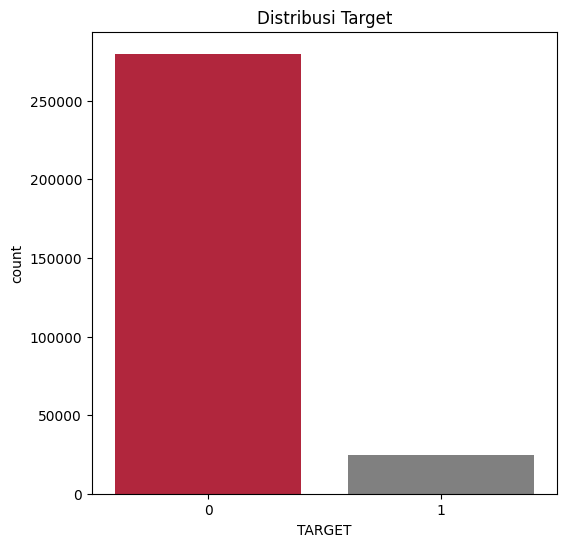

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='TARGET', data=app_train, palette=['#C80F2E', 'grey'])
plt.title('Distribusi Target')
plt.show()

- Dari output di atas, kita dapat lihat bahwa jumlah klien yang tidak dapat melunasi tagihan kredit (0) jauh lebih banyak dibanding pinjaman yang tidak terlunasi (1).

#### 3.4.1.2 Pie Chart

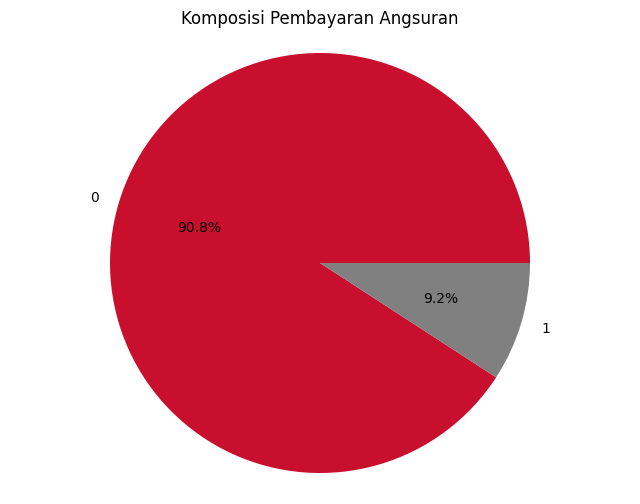

In [ ]:
plt.style.use('seaborn-pastel')
contract_val = app_train['NAME_CONTRACT_TYPE'].value_counts()
contract_df = pd.DataFrame({'labels': contract_val.index,
                            'values': contract_val.values})
plt.figure(figsize=(8, 6))
plt.pie(contract_df['values'], labels=contract_df['labels'], autopct='%1.1f%%',
        colors=['#C80F2E', 'grey'])
plt.title('Komposisi Pembayaran Angsuran')
plt.axis('equal')
plt.show()

- output di atas menunjukkan bahwa jumlah cash loans jauh lebih banyak (90,8%) dibanding revolving loans (9,2%).

### 3.4.2 Bivariate Analysis

#### 3.4.2.1 Countplot

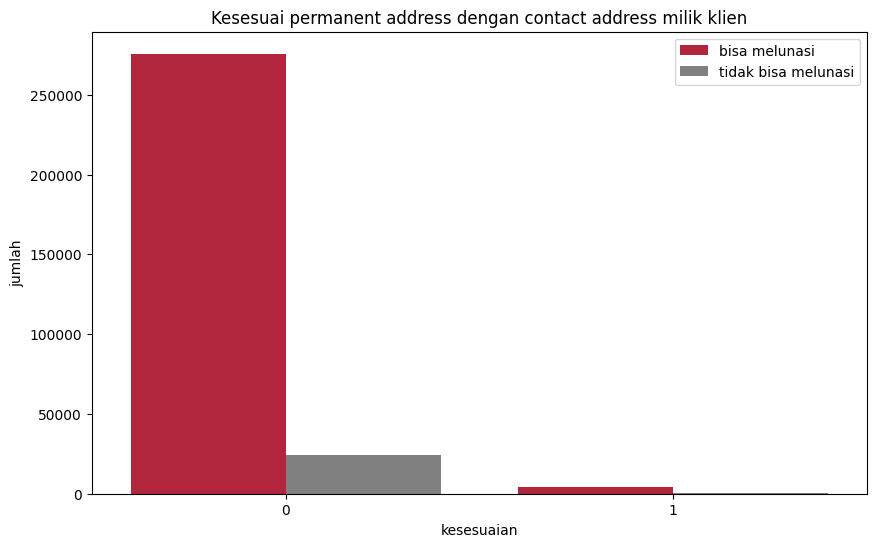

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='REG_REGION_NOT_LIVE_REGION', hue='TARGET', data=app_train, palette=['#C80F2E', 'grey'])
plt.title('Kesesuai permanent address dengan contact address milik klien')
plt.xlabel('kesesuaian')
plt.ylabel('jumlah')
plt.xticks(rotation=0)
plt.legend(['bisa melunasi', 'tidak bisa melunasi'])
plt.show()

- output di atas menunjukkan bahwa sebagian besar permanent address dari klien (yang bisa/tidak bisa membayar tagihan kredit) sesuai dengan contact address.

note:

*contact address is an address where a person can be contacted*

*permanent address is an address that is associated with your legal documents, such as your driver's license or passport*


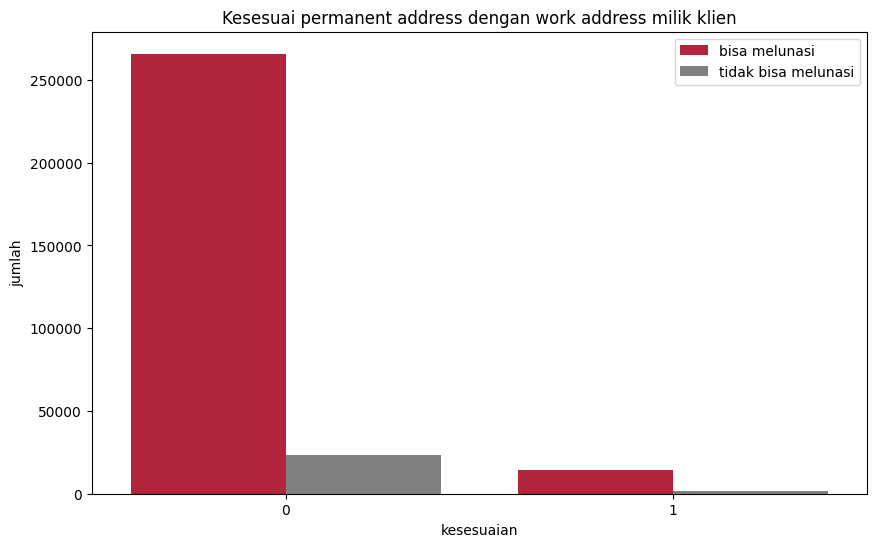

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='REG_REGION_NOT_WORK_REGION', hue='TARGET', data=app_train, palette=['#C80F2E', 'grey'])
plt.title('Kesesuai permanent address dengan work address milik klien')
plt.xlabel('kesesuaian')
plt.ylabel('jumlah')
plt.xticks(rotation=0)
plt.legend(['bisa melunasi', 'tidak bisa melunasi'])
plt.show()

- output di atas menunjukkan bahwa, sebagian besar permanent address milik klien (yang bisa/tidak bisa membayar tagihan kredit) sesuai dengan alamat kantornya.

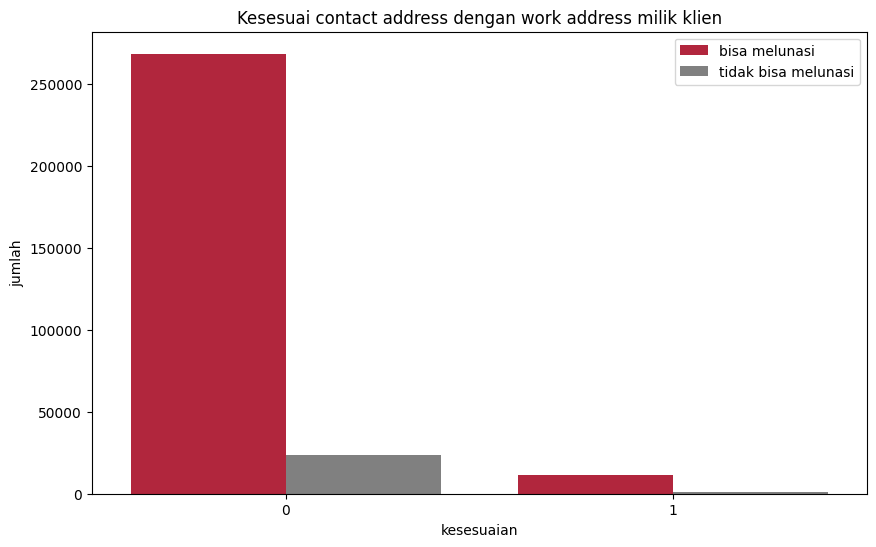

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='LIVE_REGION_NOT_WORK_REGION', hue='TARGET', data=app_train, palette=['#C80F2E', 'grey'])
plt.title('Kesesuai contact address dengan work address milik klien')
plt.xlabel('kesesuaian')
plt.ylabel('jumlah')
plt.xticks(rotation=0)
plt.legend(['bisa melunasi', 'tidak bisa melunasi'])
plt.show()

- output di atas menunjukkan bahwa, sebagian besar contact address klien (yang bisa/tidak bisa membayar tagihan kredit) sesuai dengan alamat kantornya.

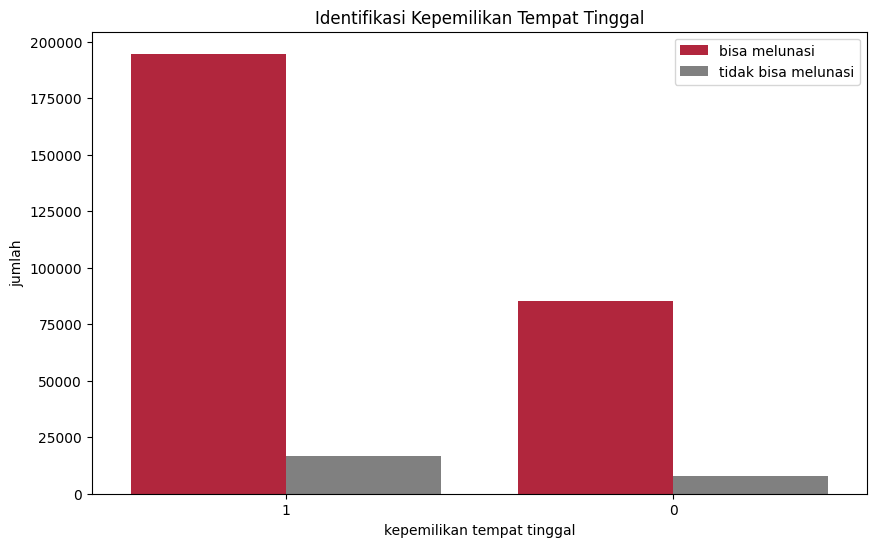

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='FLAG_OWN_REALTY', hue='TARGET', data=app_train, palette=['#C80F2E', 'grey'])
plt.title('Identifikasi Kepemilikan Tempat Tinggal')
plt.xlabel('kepemilikan tempat tinggal')
plt.ylabel('jumlah')
plt.xticks(rotation=0)
plt.legend(['bisa melunasi', 'tidak bisa melunasi'])
plt.show()

- output di atas menunjukkan bahwa sebagian besar klien (yang bisa/tidak bisa membayar tagihan kredit) memiliki tempat tinggal.

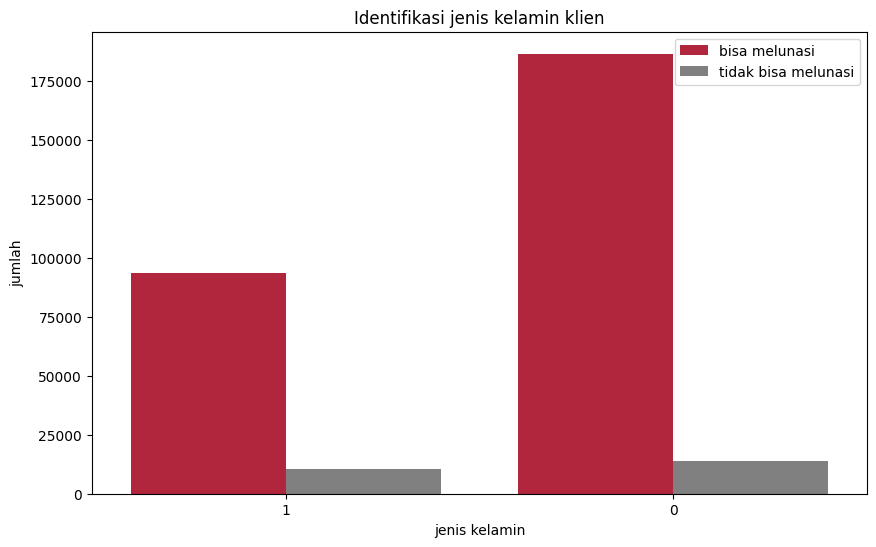

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CODE_GENDER', hue='TARGET', data=app_train, palette=['#C80F2E', 'grey'])
plt.title('Identifikasi jenis kelamin klien')
plt.xlabel('jenis kelamin')
plt.ylabel('jumlah')
plt.xticks(rotation=0)
plt.legend(['bisa melunasi', 'tidak bisa melunasi'])
plt.show()

- Output di atas menunjukkan bahwa sebagian besar klien (yang bisa/tidak bisa membayar tagihan kredit) berjenis kelamin perempuan.
- Namun, jika dibandingkan, selisih antara klien laki-laki yang bisa dan tidak membayar tagihan lebih kecil dibandingan klien perempuan. Hal tersebut bisa jadi menandakan bahwa klien berjenis kelami perempuan lebih mungkin mengembalikan atau melunasi tagihan kredit.

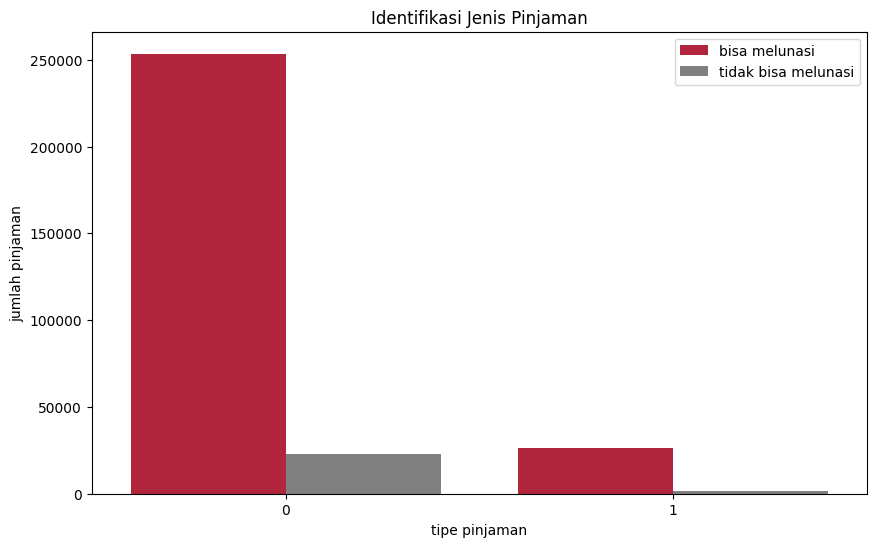

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=app_train, palette=['#C80F2E', 'grey'])
plt.title('Identifikasi Jenis Pinjaman')
plt.xlabel('tipe pinjaman')
plt.ylabel('jumlah pinjaman')
plt.xticks(rotation=0)
plt.legend(['bisa melunasi', 'tidak bisa melunasi'])
plt.show()

- Dari output di atas, kita dapat ketahui bahwa sebagian besar klien memiliki jenis pinjaman tunai (cash loans).

In [ ]:
# Membuat subset data yang hanya berisi kolom sumber pemasukan dan target
subset_data = app_train[['NAME_INCOME_TYPE', 'TARGET']]

In [ ]:
#Menghitung jumlah pengamatan pada setiap kategori sumber pemasukan
income_type_counts = subset_data['NAME_INCOME_TYPE'].value_counts()

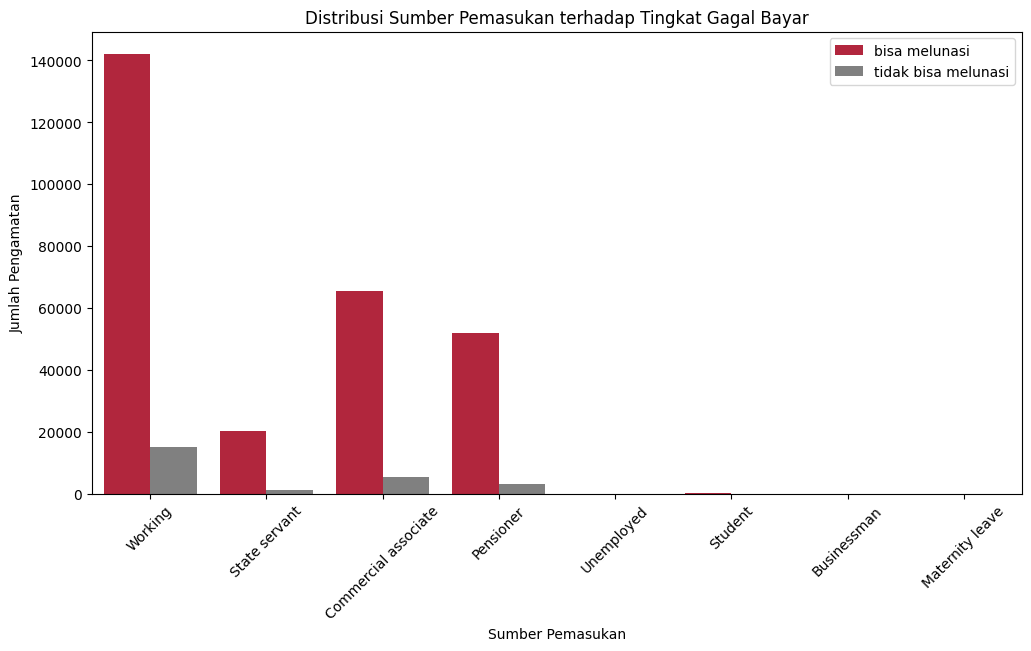

In [ ]:
# Menampilkan distribusi sumber pemasukan terhadap tingkat gagal bayar
plt.figure(figsize=(12, 6))
color='#C80F2E',
sns.countplot(x='NAME_INCOME_TYPE', hue='TARGET', data=subset_data, palette=['#C80F2E', 'grey'])
plt.title('Distribusi Sumber Pemasukan terhadap Tingkat Gagal Bayar')
plt.xlabel('Sumber Pemasukan')
plt.ylabel('Jumlah Pengamatan')
plt.xticks(rotation=45)
plt.legend(['bisa melunasi', 'tidak bisa melunasi'])
plt.show()

- Output di atas menunjukkan bahwa kebanyakan klien memiliki sumber pemasukan dari pekerjaannya sebagai seorang pekerja.
- Untuk setiap jenis pekerjaan, sebagian besar klien dapat membayar tagihan kredit.

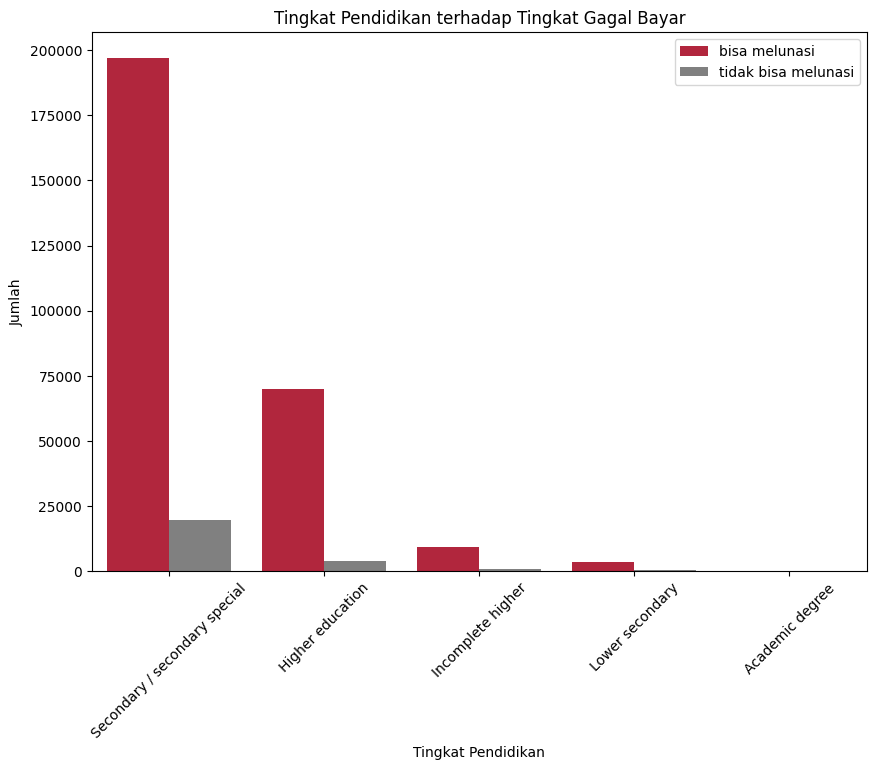

In [ ]:
#Plot hubungan antara tingkat pendidikan dan variabel sasaran
plt.figure(figsize=(10, 7))
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=app_train, palette=['#C80F2E', 'grey'])
plt.title('Tingkat Pendidikan terhadap Tingkat Gagal Bayar')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(['bisa melunasi', 'tidak bisa melunasi'])
plt.show()

- Output di atas menunjukkan bahwa kebanyakan tingkat pendidikan klien berada di jenjang secondary/secondary special, lalu diikuti oleh higher education, incomplete higher, lower secondary, dan academic degree.

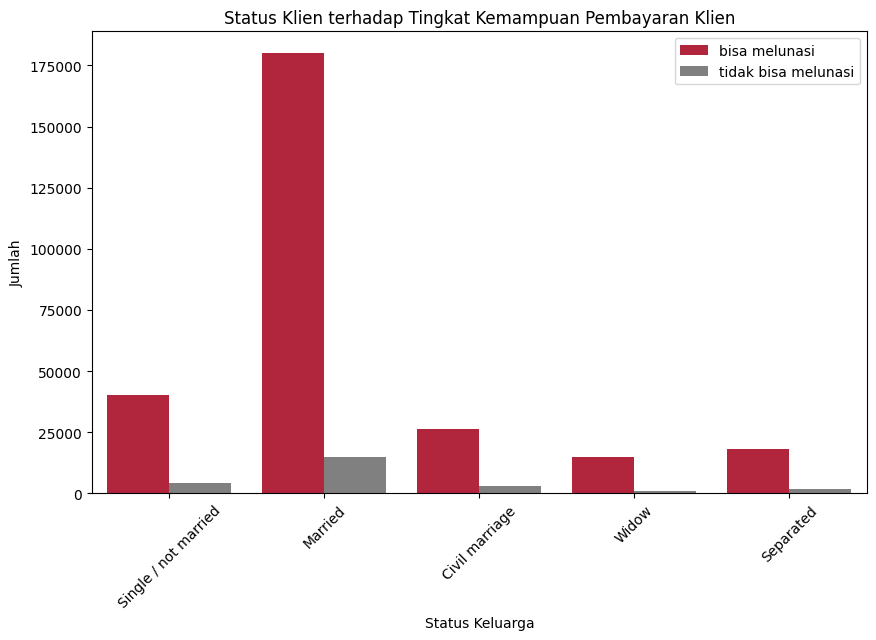

In [ ]:
#Plot hubungan antara status keluarga dan variabel target
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_FAMILY_STATUS', hue='TARGET', data=app_train, palette=['#C80F2E', 'grey'])
plt.title('Status Klien terhadap Tingkat Kemampuan Pembayaran Klien')
plt.xlabel('Status Keluarga')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(['bisa melunasi', 'tidak bisa melunasi'])
plt.show()

- Output di atas menunjukkan bahwa sebagian besar klien berstatus menikah, lalu diikuti oleh status single, civil marriage, separated, widow.
- Untuk seetiap status, sebagian besar klien dapat membayar tagihan kredit.

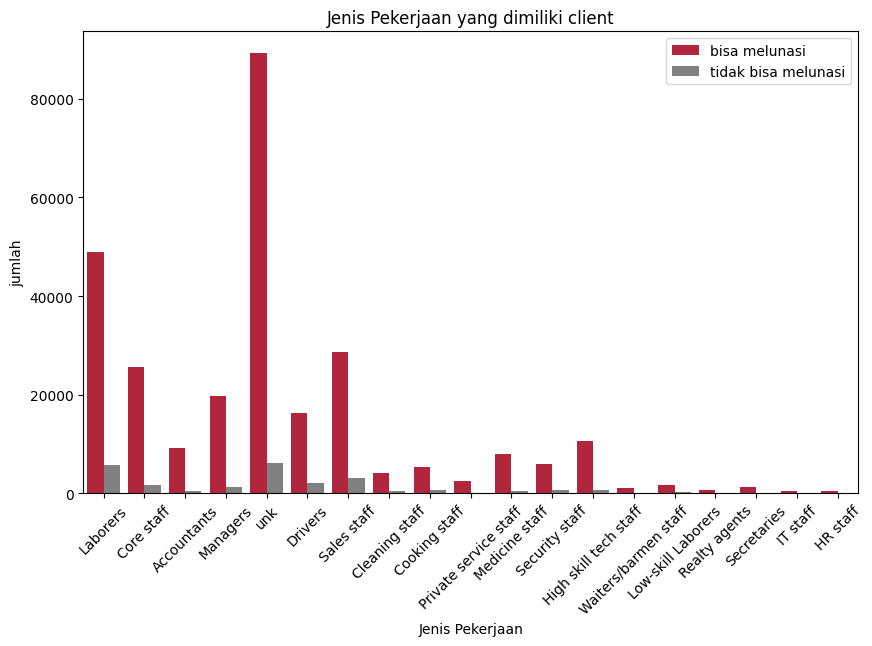

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='OCCUPATION_TYPE', hue='TARGET', data=app_train, palette=['#C80F2E', 'grey'])
plt.title('Jenis Pekerjaan yang dimiliki client')
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('jumlah')
plt.xticks(rotation=45)
plt.legend(['bisa melunasi', 'tidak bisa melunasi'])
plt.show()

- Output di atas menunjukkan bahwa sebagian besar klien tidak diketahui jenis perkerjaannya.
- Untuk jenis pekerjaan yang diketahui,sebagian besar klien bekerja sebagai laborers.

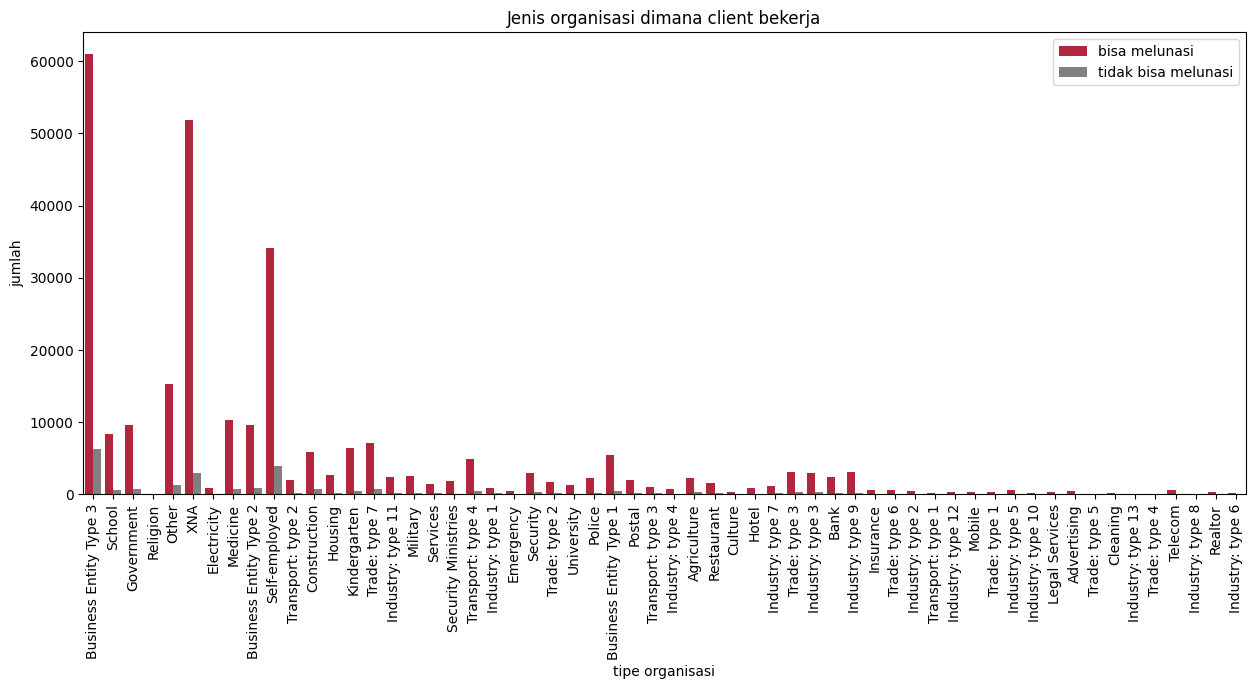

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='ORGANIZATION_TYPE', hue='TARGET', data=app_train, palette=['#C80F2E', 'grey'])
plt.title('Jenis organisasi dimana client bekerja')
plt.xlabel('tipe organisasi')
plt.ylabel('jumlah')
plt.xticks(rotation=90)
plt.legend(['bisa melunasi', 'tidak bisa melunasi'])
plt.show()

- Output di atas menunjukkan bahwa sebagian besar klien bekerja dengan Business Entity Type 3.

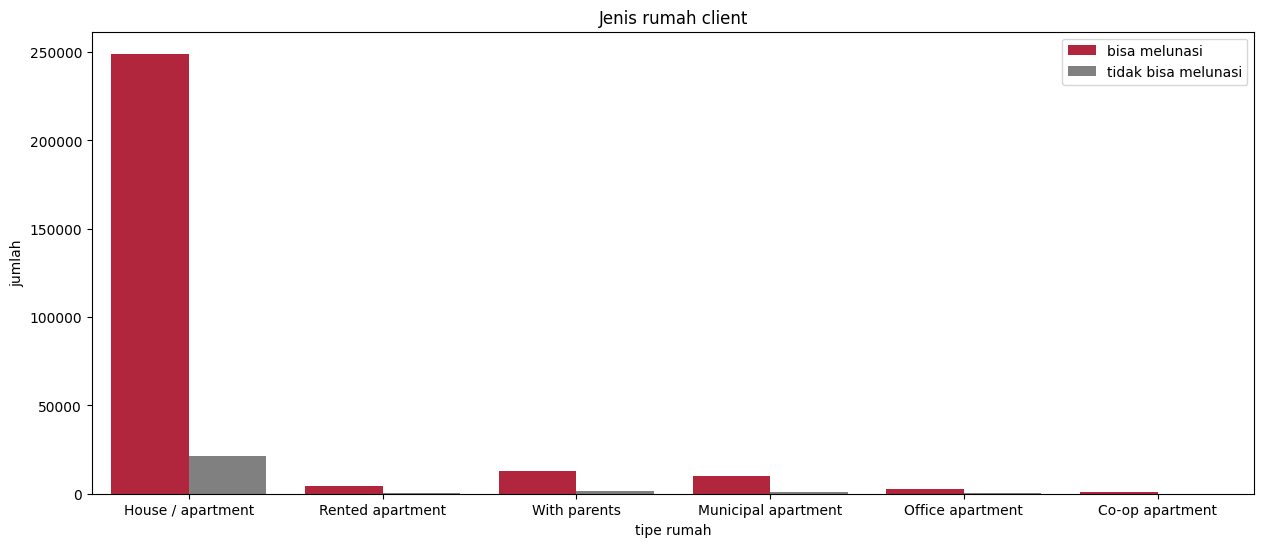

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='NAME_HOUSING_TYPE', hue='TARGET', data=app_train, palette=['#C80F2E', 'grey'])
plt.title('Jenis rumah client')
plt.xlabel('tipe rumah')
plt.ylabel('jumlah')
plt.xticks(rotation=0)
plt.legend(['bisa melunasi', 'tidak bisa melunasi'])
plt.show()

- Output di samping menunjukkan jumlah  jenis rumah yang dapat melunasi pinjaman terbanyak adalah "House / apartment".


#### 3.4.2.2 Boxplot

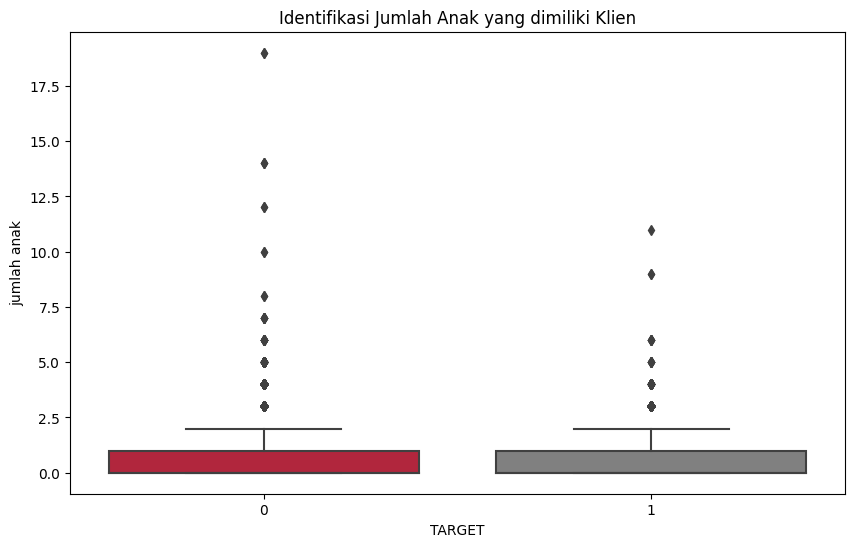

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='CNT_CHILDREN', data=app_train, palette=['#C80F2E', 'grey'])
plt.title('Identifikasi Jumlah Anak yang dimiliki Klien')
plt.xlabel('TARGET')
plt.ylabel('jumlah anak')
plt.show()

- Pada boxplot tersebut, terlihat jika client rata-rata memiliki anak dari 1-2. Kemudian beberapa client juga terlihat memiliki anak diatas 2 yang mana teridentifikasi sebagai outliers.

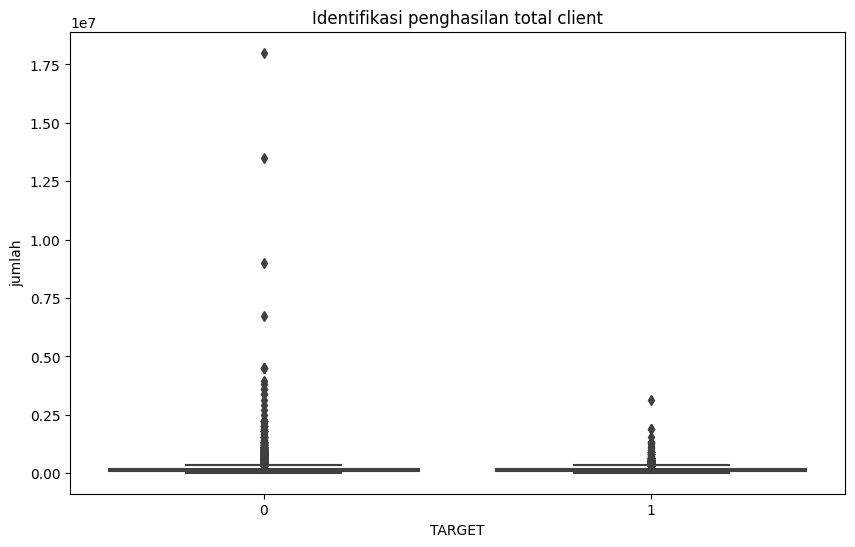

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train, palette=['#C80F2E', 'grey'])
plt.title('Identifikasi penghasilan total client')
plt.xlabel('TARGET')
plt.ylabel('jumlah')
plt.show()

- Dari boxplot tersebut terlihat bahwa rata-rata client memiliki penghasilan dibawah 2.500.000. Kemudian client yang memiliki penghasilan total yang sangat besar teridentifikasi oleh outliers. Client yang memiliki penghasilan terbesar berada di 17.500.000

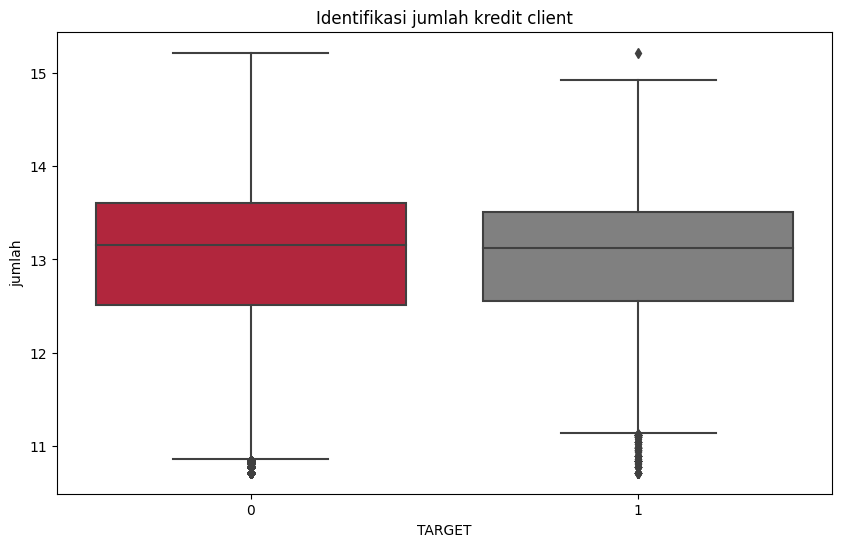

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=app_train, palette=['#C80F2E', 'grey'])
plt.title('Identifikasi jumlah kredit client')
plt.xlabel('TARGET')
plt.ylabel('jumlah')
plt.show()

- Jumlah kredit client berada di jangkauan 11-15. Namun, client memiliki rata-rata jumlah kredit di angka kisaran 13.

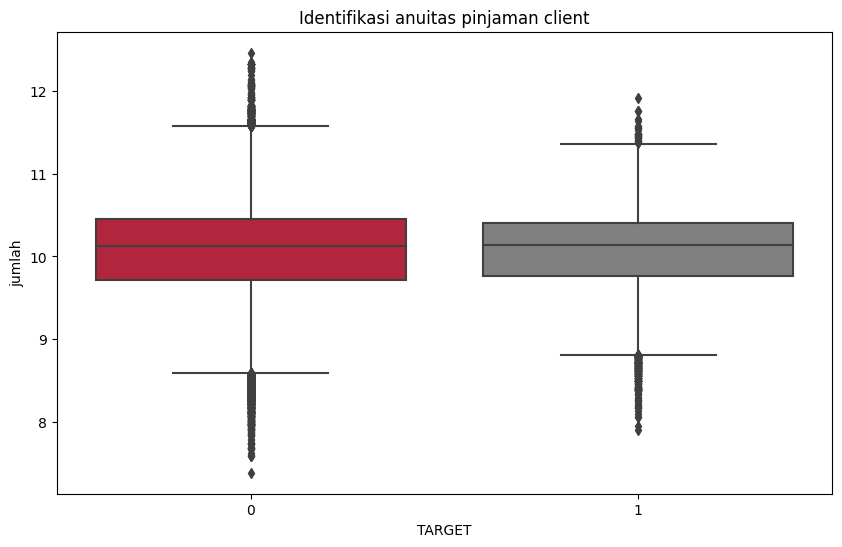

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TARGET', y='AMT_ANNUITY', data=app_train, palette=['#C80F2E', 'grey'])
plt.title('Identifikasi anuitas pinjaman client')
plt.xlabel('TARGET')
plt.ylabel('jumlah')
plt.show()

- AMT_CREDIT, CNT_CHILDREN, AMT_ANNUITY, AMT_INCOME_TOTAL  W.R.T TARGET: menunjukkan bahwa distribusi AMT_ANNUITY pada kelompok dengan TARGET = 0 dan kelompok dengan TARGET = 1 cenderung memiliki median yang serupa dan rentang nilai yang relatif seimbang. Hal ini mengindikasikan bahwa tidak ada perbedaan yang signifikan

#### 3.4.2.3 Distplot

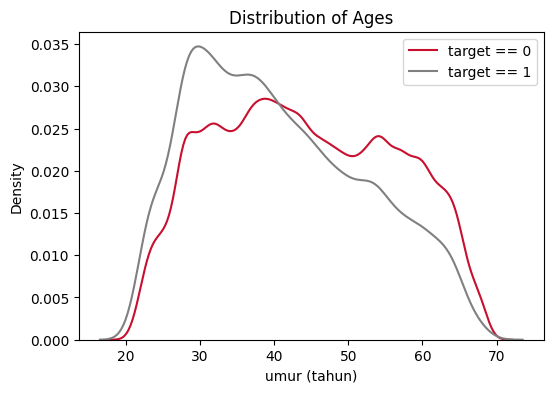

In [ ]:
plt.figure(figsize = (6, 4))

sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0', color = '#C80F2E')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1', color = 'grey')

plt.xlabel('umur (tahun)'); plt.ylabel('Density'); plt.title('Distribution of Ages')
plt.legend()
plt.show()

- Output umur (DAYS_BIRTH/-365) klien menunjukkan bahwa klien yang berumur sekitaran 30 tahun lebih berkemungkinan untuk gagal membaya tagihan kredit dibanding klien dengan tahun lainnya.


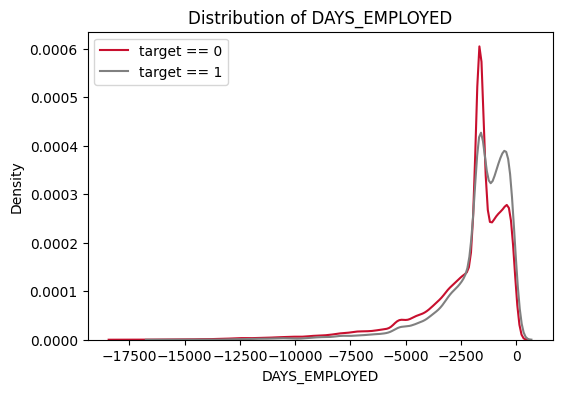

In [ ]:
plt.figure(figsize = (6, 4))

sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_EMPLOYED'], label = 'target == 0', color = '#C80F2E')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_EMPLOYED'], label = 'target == 1', color = 'grey')

plt.xlabel('DAYS_EMPLOYED'); plt.ylabel('Density'); plt.title('Distribution of DAYS_EMPLOYED')
plt.legend()
plt.show()

- Output DAYS_EMPLOYED menunjukkan bahwa klien home kredit kebanyakan sudah bekerja selama kisaran 5-6 tahun. Untuk distribusi klien yang berhasil/gagal membayar tagihan kurang lebih sama.

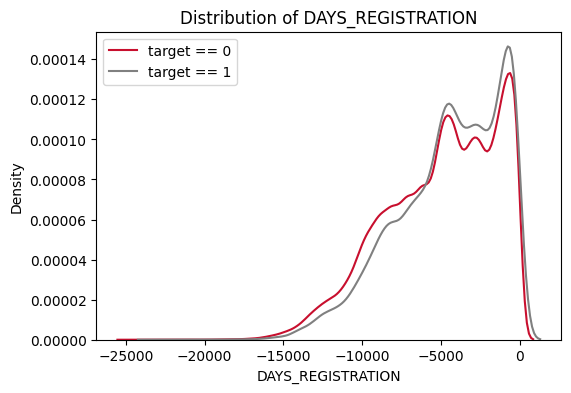

In [ ]:
plt.figure(figsize = (6, 4))

sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_REGISTRATION'], label = 'target == 0', color = '#C80F2E')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_REGISTRATION'], label = 'target == 1', color = 'grey')

plt.xlabel('DAYS_REGISTRATION'); plt.ylabel('Density'); plt.title('Distribution of DAYS_REGISTRATION')
plt.legend()
plt.show()

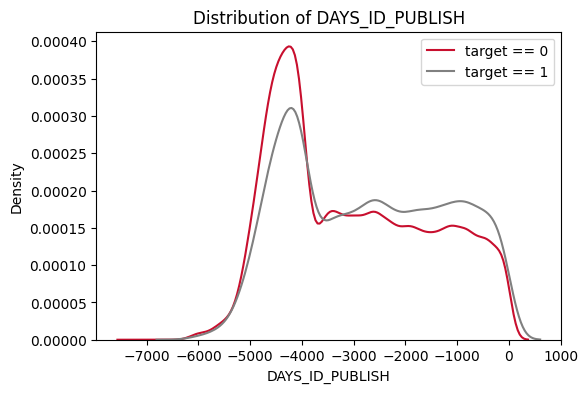

In [ ]:
plt.figure(figsize = (6, 4))

sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_ID_PUBLISH'], label = 'target == 0', color = '#C80F2E')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_ID_PUBLISH'], label = 'target == 1', color = 'grey')

plt.xlabel('DAYS_ID_PUBLISH'); plt.ylabel('Density'); plt.title('Distribution of DAYS_ID_PUBLISH')
plt.legend()
plt.show()

### 3.4.3 Multivariate Analysis

#### 3.4.3.1 Boxplot

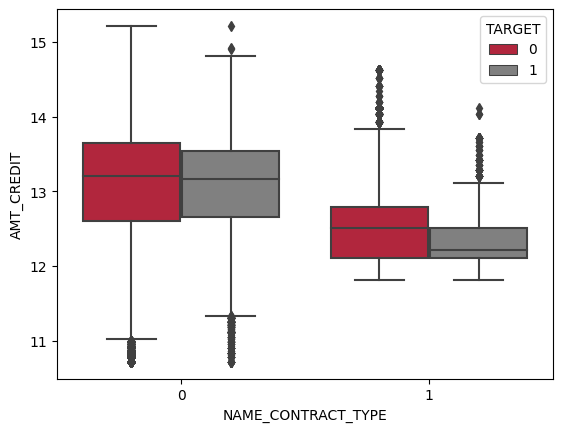

In [ ]:
sns.boxplot(x = app_train['NAME_CONTRACT_TYPE'],
            y = app_train['AMT_CREDIT'],
            hue = app_train['TARGET'], palette=['#C80F2E', 'grey'] )
plt.show()

- Distribusi tipe pinjaman cash loans dan revolving loans terhadap jumlah kredit cukup berbeda. Untuk cash loans, klien yang bisa/gagal membayar tagihan kredit memiliki median yang hampir sama. Sedangkan untuk revolving loans, nilai mediannya berbeda.

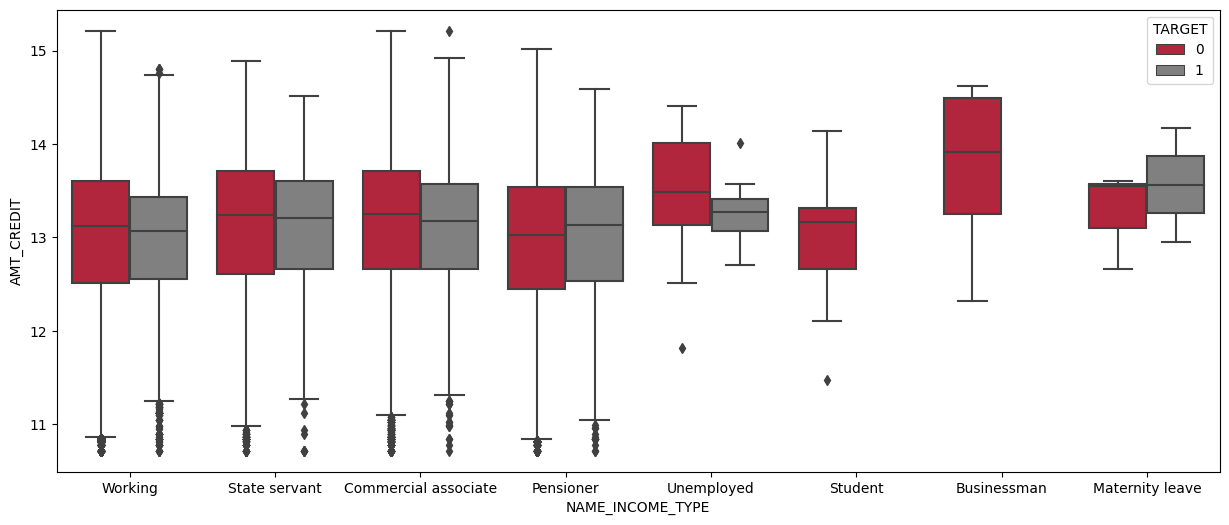

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x = app_train['NAME_INCOME_TYPE'],
            y = app_train['AMT_CREDIT'],
            hue = app_train['TARGET'], palette=['#C80F2E', 'grey'] )
plt.show()

- Distribusi AMT_CREDIT untuk tipe pendapatan klien dari working, state sevant, commercial assistant, dan pensioner cukup sama.
- Menariknya, untuk student dan businessman tidak ditemukan klien yang gagal membayar tagihan kredit.

#### 3.4.3.2 Scatterplot

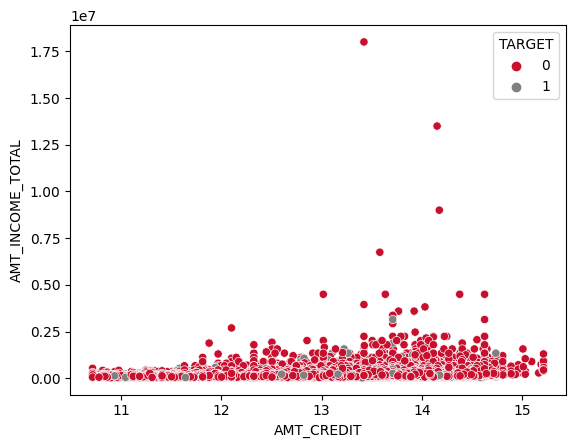

In [ ]:
sns.scatterplot(data=app_train,
                x="AMT_CREDIT",
                y="AMT_INCOME_TOTAL",
                hue = 'TARGET',
                palette=['#C80F2E', 'grey'])
plt.show()

- Output di atas menunjukkan bahwa jumlah penghasilan total klien tidak secara langsung berhubungan dengan jumlah kredit yang dimiliki klien.
- Output juga menunjukkan bahwa sebagian besar klien memiliki penghasil di kisaran 0 -- 2,5M.

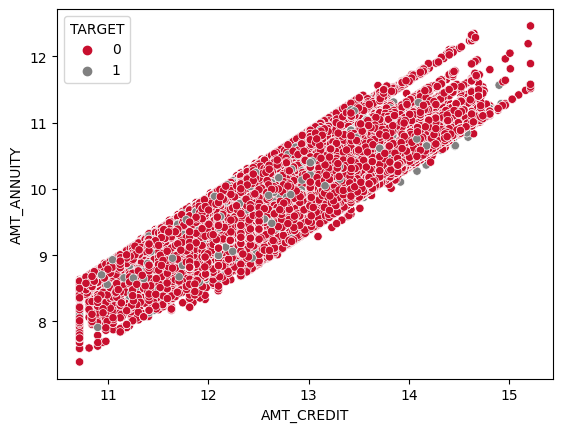

In [ ]:
sns.scatterplot(data=app_train,
                x="AMT_CREDIT",
                y="AMT_ANNUITY",
                hue = 'TARGET',
                palette=['#C80F2E', 'grey'])
plt.show()

- Output di atas menunjukkan bahwa jumlah tunjangan secara berbanding lurus berhubungan dengan jumlah kredit klien.

#### 3.4.3.3 Heatmap

<Axes: >

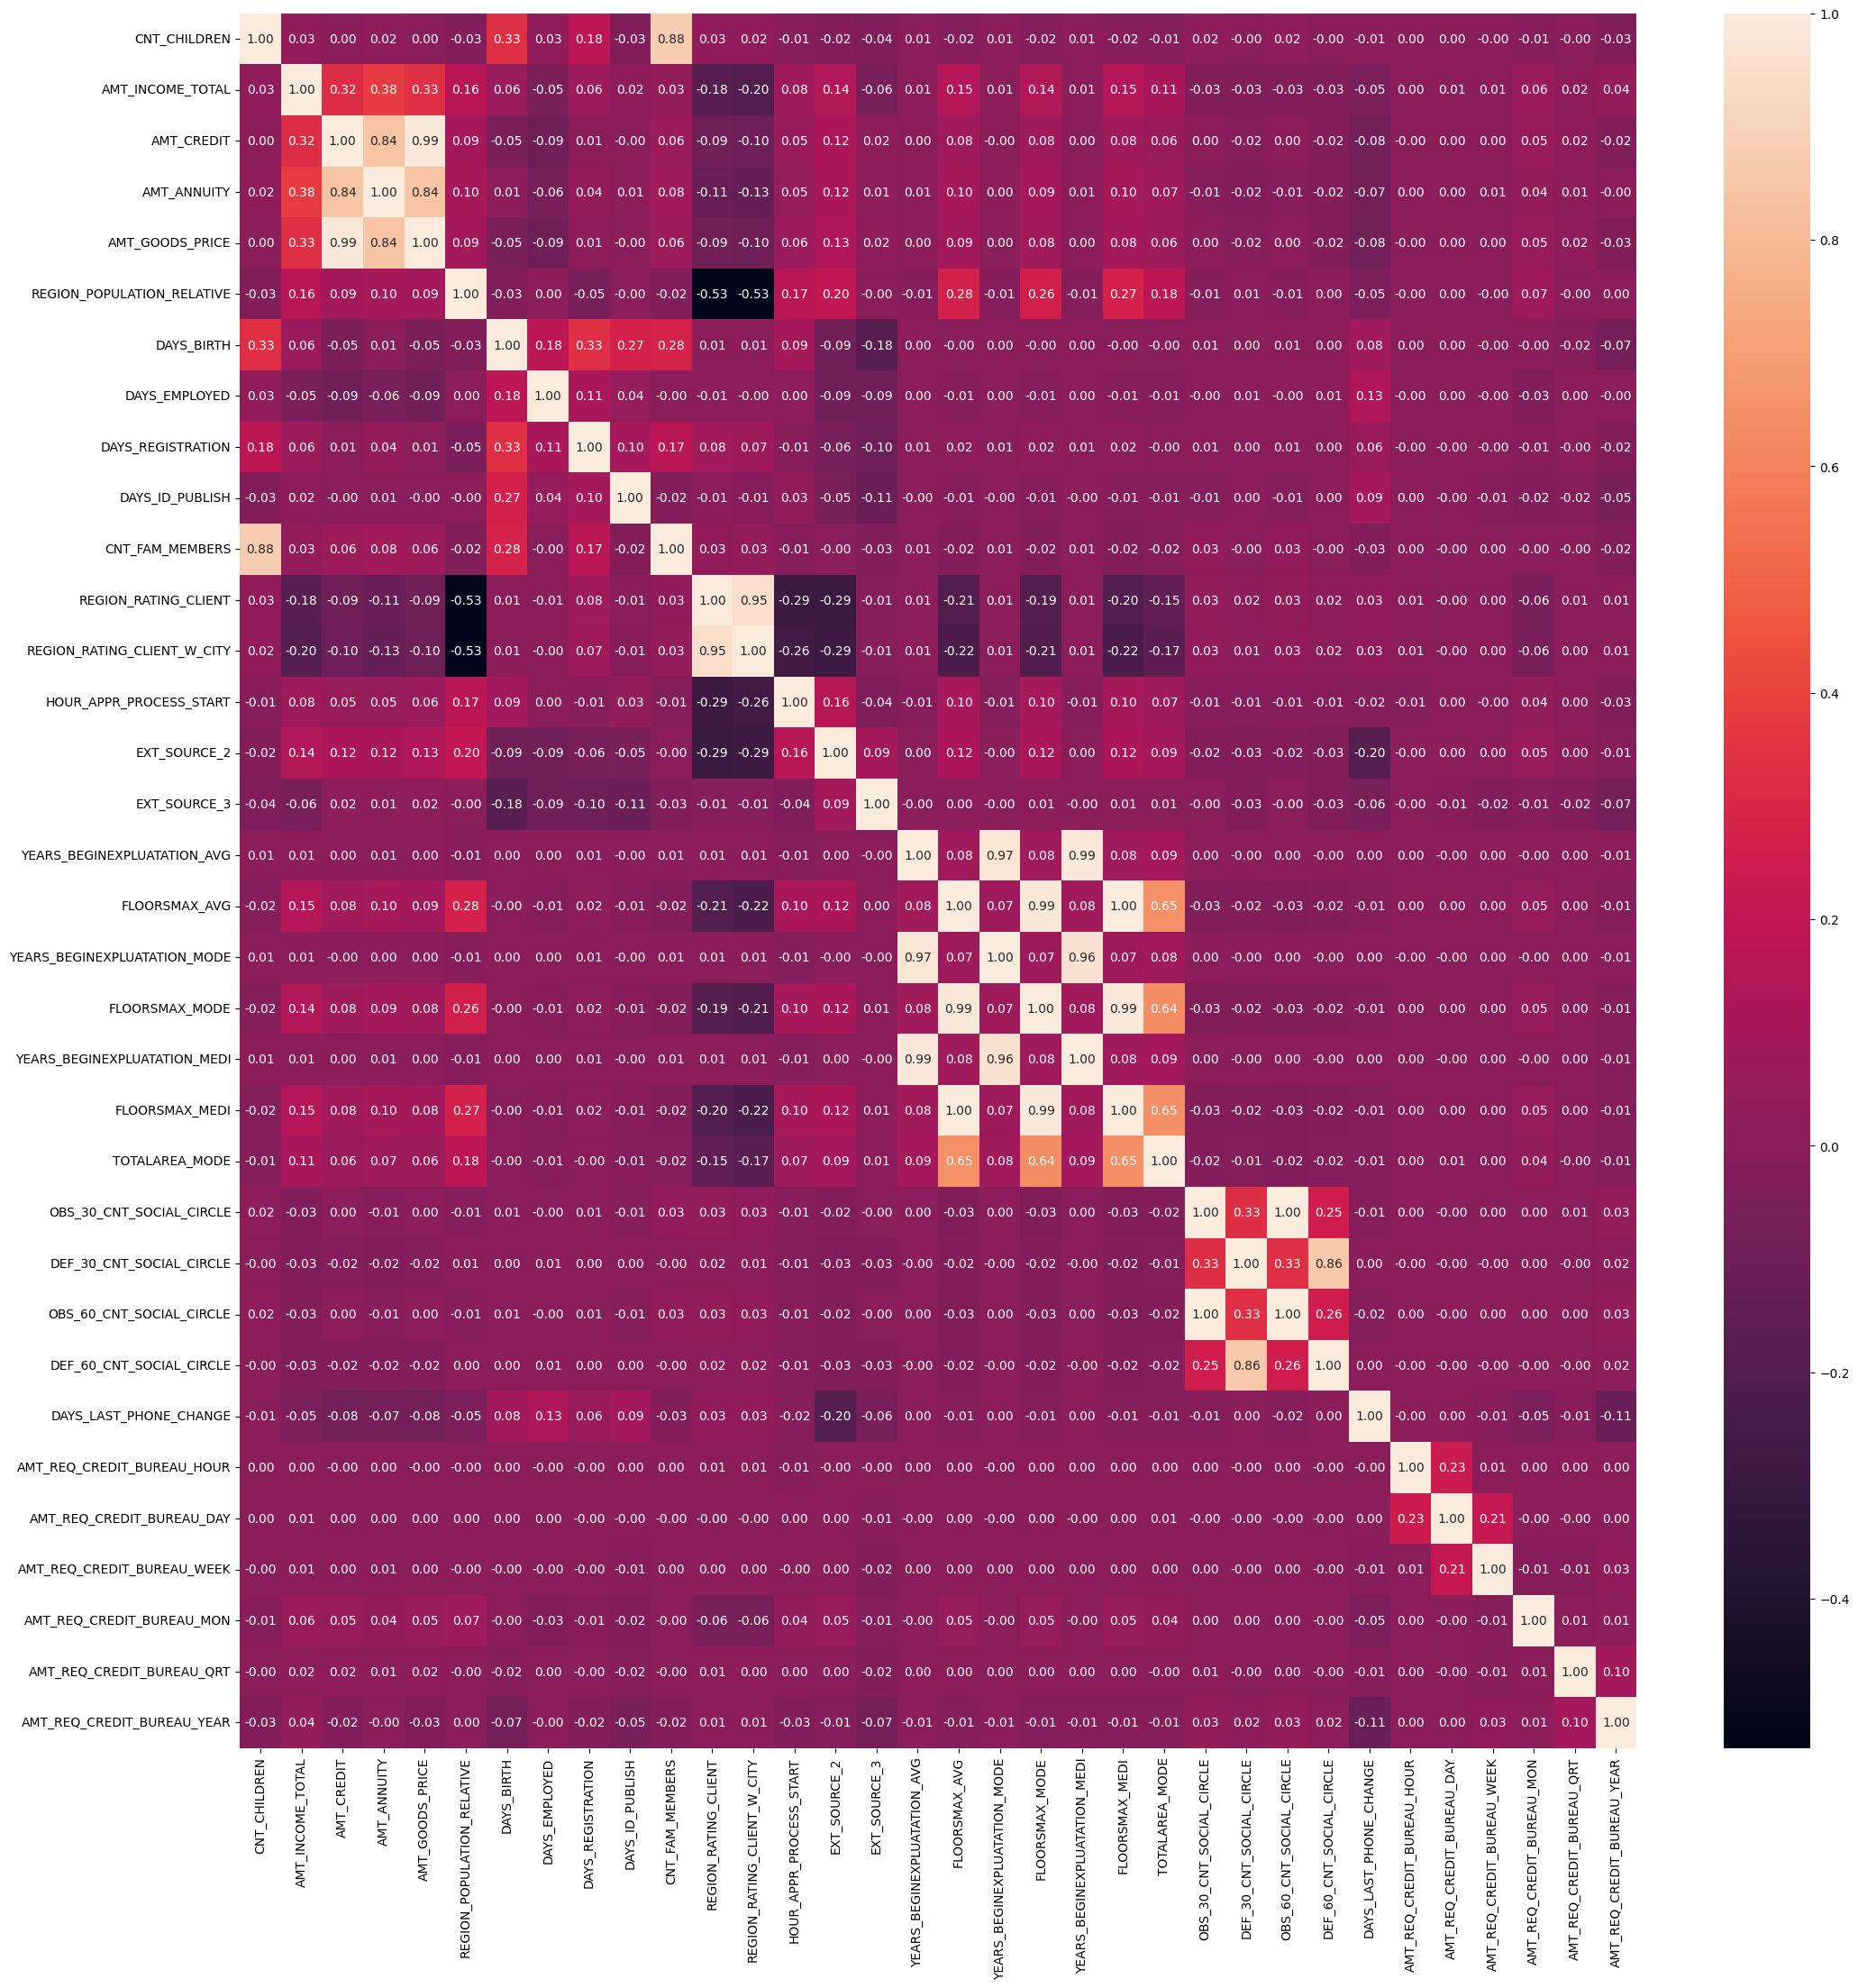

In [ ]:
#Memplot heatmap untuk melihat kolerasi numerik satu sama lain (data numerik)
plt.figure(figsize=(25, 25))
sns.heatmap(app_train[nums_train].corr(), annot=True, fmt='.2f')

Pada heatmap tersebut, dapat terlihat korelasi antar variabel lainnya. Dalam Visualisasi data di proses EDA ini yaitu dengan plot pembuatan heatmap dapat diketahui bahwa :
- Jika angka pada heatmap (+) (positif) maka akan berbanding lurus yaitu semakin besar suatu variabel maka variabel lainnya juga akan semakin besar pula korelasinya satu sama lain.
- Jika angka pada heatmap (-) (negatif) maka akan berbanding terbalik yaitu semakin kecil suatu variabel maka variabel lainnya juga akan semakin kecil pula korelasinya satu sama lain.

#4. MODELING & EVALUATION

Untuk meminimalisir tingkat error maka bagian modeling dan evaluation dikerjakan pada notebook ini

https://colab.research.google.com/drive/1u-djBiqNAP_Juq8iOsJormmjt0ZWKbjC